In [1]:
if(!require(FNN)){
    install.packages('FNN')    
}
if(!require(kBET)){
    devtools::install_github('theislab/kBET') ## If this doesn't work, download and unzip the code from github, and run R CMD INSTALL.   
}
library(kBET)
library(tidyverse)
library(reticulate)
if(!require(data.table)){
    install.packages('data.table')
}
if(!require(R.utils)){
    install.packages('R.utils')    
}
library(data.table)

Loading required package: FNN

Loading required package: kBET

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: R.utils

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.0 (2020-02-14 07:10:20 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.23.0 successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘pack

In [2]:
use_python("/home/ubuntu/miniconda3/envs/myenv/bin")
use_condaenv("myenv")

In [3]:
#sb <- import("subset")
np <- import("numpy")
pd <- import("pandas")
os <- import("os")
#source_python('./subsetting_utils.ipynb')

In [4]:
data_dir = '/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects'
file_list = c()
for(file in os$listdir(data_dir)){
    #print os.path.join(subdir, file)
    filepath = paste(data_dir, file, sep=os$sep)

    if(grepl(".csv.gz", filepath, fixed = TRUE)){
        file_list = file_list %>% append(filepath)
    }
}
file_list

[1] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/Well_Corrected_Cell_Data_All_Batches_Medium.csv.gz" 
 [2] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/Uncorrected_Cell_Data_All_Batches.csv.gz"           
 [3] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/Well_Corrected_Cell_Data_All_Batches.csv.gz"        
 [4] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/Well_Corrected_Cell_Data_All_Batches_Small.csv.gz"  
 [5] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/Plate_Corrected_Cell_Data_All_Batches.csv.gz"       
 [6] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/Plate_Corrected_Cell_Data_All_Batches_Medium.csv.gz"
 [7] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/Plate_Corrected_Cell_Data_All_Batches_Small.csv.gz" 
 [8] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/Sample_Corrected_Cell_Data_All_Batches.csv.gz"      
 [9] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/PCA_Uncorrected_Cell_Data_All_Batches.csv.gz"       
[10] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/PCA_Uncorrected_Cell_Data_All_Batches_Medium.csv.gz"
[11] "/home/ubuntu/efs/2015_07_01_Cell_Health_Vazquez_Cancer_Broad/workspace/software/cell-painting-batch-effects/2.Correct-Batch-Effects/PCA_Uncorrected_Cell_Data_All_Batches_Small.csv.gz"

In [5]:
for (file in file_list){
    if (file %>% endsWith("Medium.csv.gz")){
        if (grepl("PCA", file, fixed = TRUE)){
            data.uncorrected = read_csv(file)
        }
        else if (grepl("Plate", file, fixed = TRUE)){
            data.plate = read_csv(file)
        }
        else if (grepl("Well", file, fixed = TRUE)){
            data.well = read_csv(file)
        }
    }
}

Parsed with column specification:
cols(
  Metadata_Plate = col_character(),
  Metadata_Well = col_character(),
  Metadata_plate_map_name = col_character(),
  Metadata_CellLine = col_character(),
  Metadata_Dosage = col_double(),
  pca_0_adjusted = col_double(),
  pca_1_adjusted = col_double(),
  pca_2_adjusted = col_double(),
  pca_3_adjusted = col_double(),
  pca_4_adjusted = col_double(),
  pca_5_adjusted = col_double(),
  pca_6_adjusted = col_double(),
  pca_7_adjusted = col_double(),
  pca_8_adjusted = col_double(),
  pca_9_adjusted = col_double(),
  pca_10_adjusted = col_double()
)

Parsed with column specification:
cols(
  Metadata_Plate = col_character(),
  Metadata_Well = col_character(),
  Metadata_plate_map_name = col_character(),
  Metadata_CellLine = col_character(),
  Metadata_Dosage = col_double(),
  pca_0_adjusted = col_double(),
  pca_1_adjusted = col_double(),
  pca_2_adjusted = col_double(),
  pca_3_adjusted = col_double(),
  pca_4_adjusted = col_double(),
  pca_5_adj

In [7]:
data.well = data.well %>% unite(Subset, Metadata_CellLine, Metadata_Dosage, sep='_', remove=FALSE)
data.plate = data.plate %>% unite(Subset, Metadata_CellLine, Metadata_Dosage, sep='_', remove=FALSE)
data.uncorrected = data.uncorrected %>% unite(Subset, Metadata_CellLine, Metadata_Dosage, sep='_', remove=FALSE)

subsets = unique(data.well$Subset)

Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Subset,Metadata_CellLine,Metadata_Dosage,pca_0_adjusted,pca_1_adjusted,pca_2_adjusted,pca_3_adjusted,pca_4_adjusted,pca_5_adjusted,pca_6_adjusted,pca_7_adjusted,pca_8_adjusted,pca_9_adjusted,pca_10_adjusted
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
207106_exposure320,B02,PlateMap_207106_exposure320,WT_0,WT,0,10.6612658,-2.89200307,-5.19673882,0.02709973,4.1421768,-0.93047564,-5.2826849,-1.2907583,-0.90728107,2.0898926,6.464698569
207106_exposure320,B02,PlateMap_207106_exposure320,WT_0,WT,0,-14.9876585,2.88749742,-6.86389759,-0.12750446,5.3759312,-1.43164379,-3.4586876,-2.0597589,-2.54564741,-0.1627648,5.369085506
207106_exposure320,B02,PlateMap_207106_exposure320,WT_0,WT,0,31.0578085,-2.74277782,-4.22146666,-4.77974794,5.3890024,4.76874320,-5.1943401,1.6529282,-1.82244666,-3.8806117,2.722126436
207106_exposure320,B02,PlateMap_207106_exposure320,WT_0,WT,0,2.7792884,-8.42047776,1.41299537,-4.59885052,6.0525000,-4.17152486,-0.7388876,5.9572683,0.36306022,-1.5950727,0.970385795
207106_exposure320,B02,PlateMap_207106_exposure320,WT_0,WT,0,8.5577919,1.54793598,3.72722452,5.30305587,-0.2785251,-4.56932618,-2.2398944,-3.4872101,-0.76679095,2.0657734,2.260245245
207106_exposure320,B02,PlateMap_207106_exposure320,WT_0,WT,0,-2.4698282,9.22997670,-0.42192117,-8.81653909,-7.9117435,-5.66095177,3.8270726,0.8920569,-1.43743102,1.7736320,4.085291946
207106_exposure320,B02,PlateMap_207106_exposure320,WT_0,WT,0,4.6287876,-4.59203716,-1.96006240,0.71719999,0.5198431,-1.31399539,-2.7200912,-2.0767308,3.71717495,-1.1790804,-0.002658211
207106_exposure320,B02,PlateMap_207106_exposure320,WT_0,WT,0,-5.2667043,1.17713276,1.33480482,0.94231602,0.3717685,-2.47563237,-8.2469703,2.5828698,1.82548325,1.8687383,3.375738546
207106_exposure320,B02,PlateMap_207106_exposure320,WT_0,WT,0,-9.6198630,-5.65140381,3.75256007,-2.54835194,1.8632942,-7.37643706,4.4928036,3.5706729,-0.49020662,-2.5871532,-1.157666448


In [8]:
metadata_cols = c('Metadata_Plate',
  'Metadata_Well',
  'Metadata_plate_map_name',
  'Metadata_CellLine',
  'Metadata_Dosage')

In [9]:
getKNNs <- function(data, size, k){
    t.start = Sys.time()
    #-----------
    #sample.batch = data.corrected.sample$Metadata_Plate

    #data.corrected.sample.kNN = FNN::get.knn(data.corrected.sample %>% select(-c(all_of(metadata_cols), Subset)), k = 20)

    data.sample = sample_n(data, size)

    sample.batch = data.sample$Metadata_Plate

    sample.kNN = FNN::get.knn(data.sample %>% select(-c(all_of(metadata_cols), Subset)), k = k)

    #-----------
    elapsed = Sys.time() - t.start
    print(sprintf("Time Elapsed: %s", elapsed))
    return(sample.kNN)
}

test_by_well <- function(data, size, k, testsize){
    kBET_out_list = list()
    
    subsets = unique(data.uncorrected$Subset)
    #print('got subsets')
    
    for (subset in subsets){
        
        #print('filtering...')
        data_subset = data %>% filter(Subset == subset)
        #print('filtered')
        
        #print(nrow(data_subset))
        
        sample_indices = sample.int(n = nrow(data_subset), size = min( c(size , nrow(data_subset) ) ), replace=FALSE)
        subsample = data_subset[sample_indices, ]
        subsample.batch = data_subset$Metadata_Well[sample_indices]
     
        #print(k)
        
        kBET_well = kBET(subsample %>% select(-c(all_of(metadata_cols), Subset)), subsample.batch, k0 = k, 
            knn = NULL, testSize=testsize, do.pca=FALSE, dim.pca = 4, heuristic = FALSE, n_repeat = 40,
            alpha = 0.05, addTest = FALSE, verbose = TRUE, plot = TRUE,
            adapt = TRUE)
        
        kBET_out_list[[subset]] = kBET_well
    }
    return(kBET_out_list)
}

[1] "2020-08-04 04:25:44 UTC"
[1] "1/2"
KNN input is a list, extracting nearest neighbour index.
[1] "2/2"
[1] "3/2"
KNN input is a list, extracting nearest neighbour index.


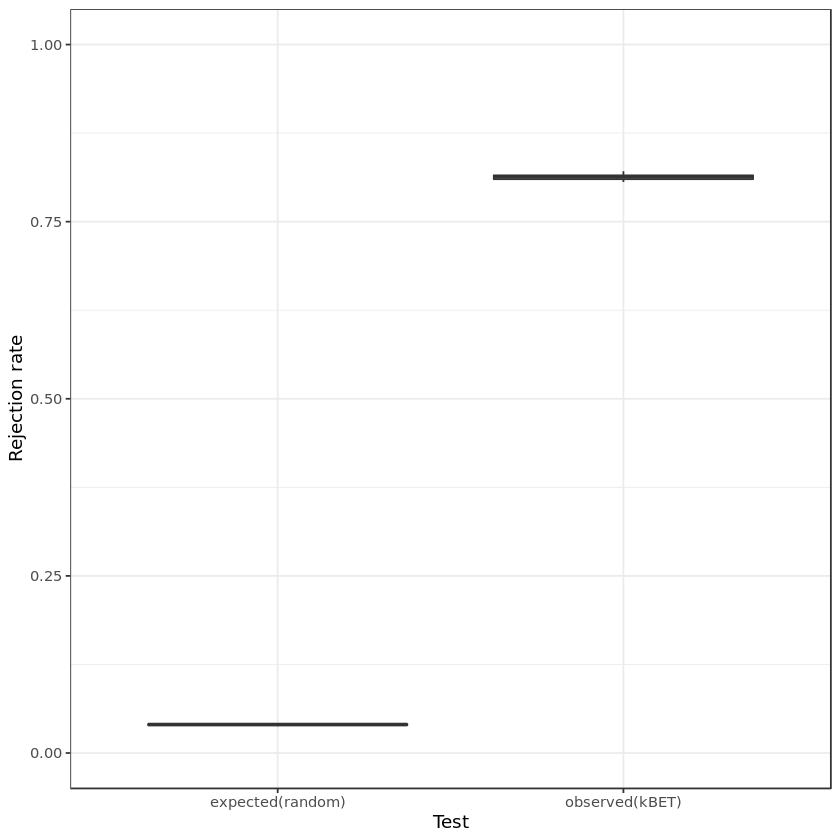

[1] "4/2"
[1] "5/2"
KNN input is a list, extracting nearest neighbour index.


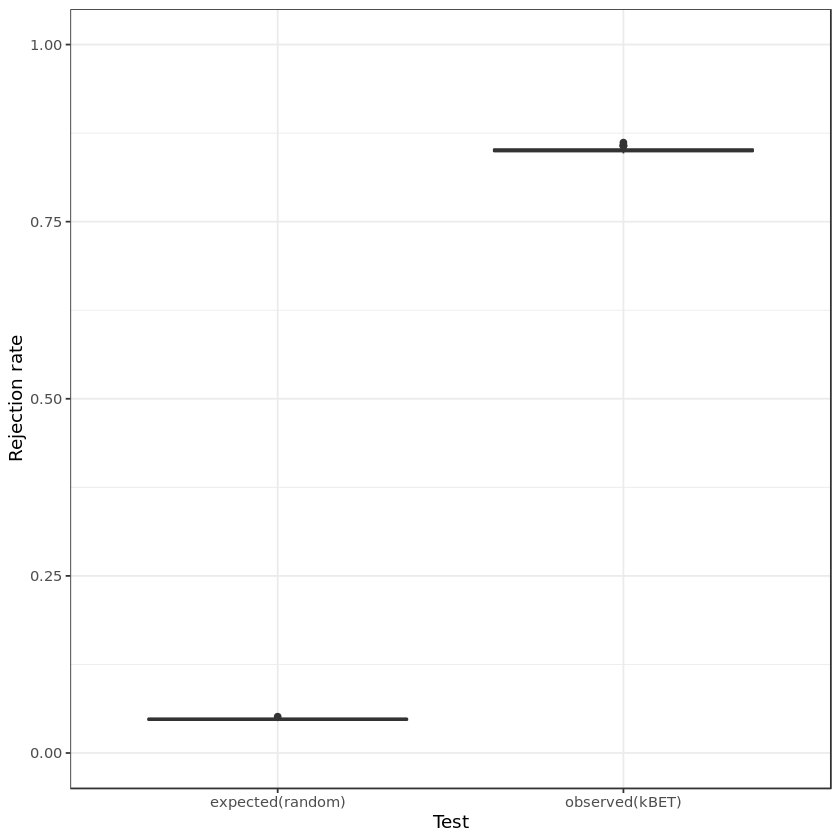

[1] "6/2"
Time difference of 50.05633 mins


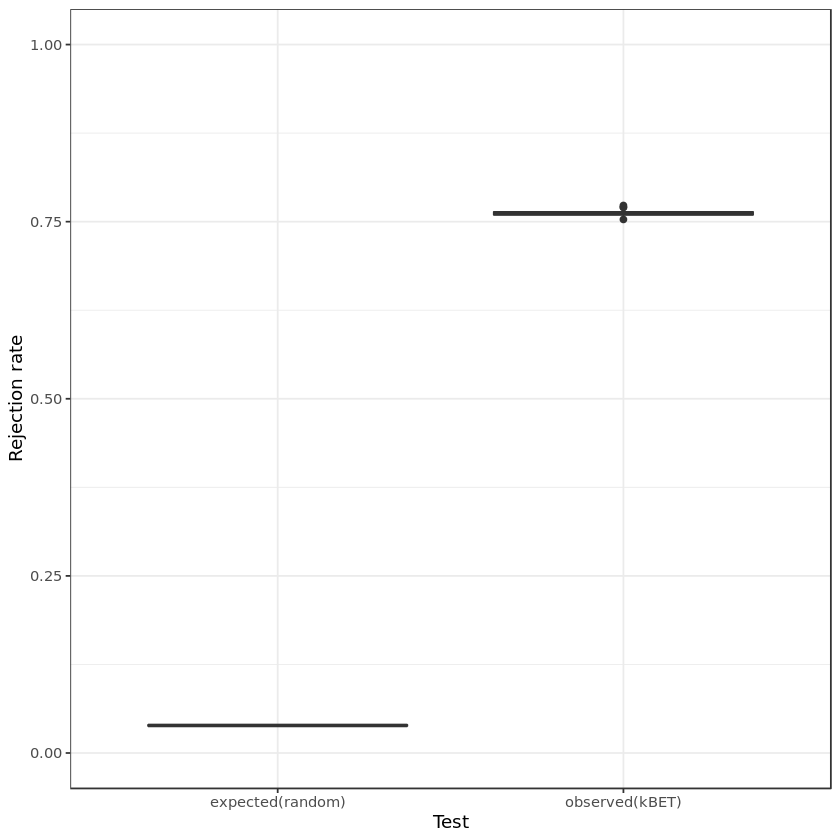

In [16]:
# Set full k's to 2000, by well to 500
# testsize to 8000, by well to 2000
# set samplesize to 80K, by_well to 20K
# n_repeat can be 40 all the time
set.seed(42)

time0 = Sys.time()
print(time0)

data.sample = sample_n(data.plate, 20000)
sample.batch = data.sample$Metadata_Plate
plate.full.knn = FNN::get.knn(data.sample %>% select(-c(all_of(metadata_cols), Subset)), k = 2000)

print('1/2')

kBET.plate.full = kBET(data.sample %>% select(-c(all_of(metadata_cols), Subset)), sample.batch, k0 = 2000, 
        knn = plate.full.knn, testSize=20000, do.pca=FALSE, dim.pca = 4, heuristic = FALSE, n_repeat = 40,
        alpha = 0.05, addTest = FALSE, verbose = TRUE, plot = TRUE,
        adapt = TRUE)

print('2/2')

data.sample = sample_n(data.uncorrected, 20000)
sample.batch = data.sample$Metadata_Plate
uncorrected.full.knn = FNN::get.knn(data.sample %>% select(-c(all_of(metadata_cols), Subset)), k = 2000)

print('3/2')

kBET.uncorrected.full = kBET(data.sample %>% select(-c(all_of(metadata_cols), Subset)), sample.batch, k0 = 2000, 
        knn = uncorrected.full.knn, testSize=20000, do.pca=FALSE, dim.pca = 4, heuristic = FALSE, n_repeat = 40,
        alpha = 0.05, addTest = FALSE, verbose = TRUE, plot = TRUE,
        adapt = TRUE)

print('4/2')

data.sample = sample_n(data.well, 20000)
sample.batch = data.sample$Metadata_Plate
well.full.knn = FNN::get.knn(data.sample %>% select(-c(all_of(metadata_cols), Subset)), k = 2000)

print('5/2')

kBET.well.full = kBET(data.sample %>% select(-c(all_of(metadata_cols), Subset)), sample.batch, k0 = 2000, 
        knn = well.full.knn, testSize=20000, do.pca=FALSE, dim.pca = 4, heuristic = FALSE, n_repeat = 40,
        alpha = 0.05, addTest = FALSE, verbose = TRUE, plot = TRUE,
        adapt = TRUE)

print('6/2')

elapsed0 = Sys.time() - time0
print(elapsed0)

finding knns...done. Time:
   user  system elapsed 
 23.914   0.052  23.971 
No outsiders found.finding knns...done. Time:
   user  system elapsed 
 24.896   0.048  24.948 


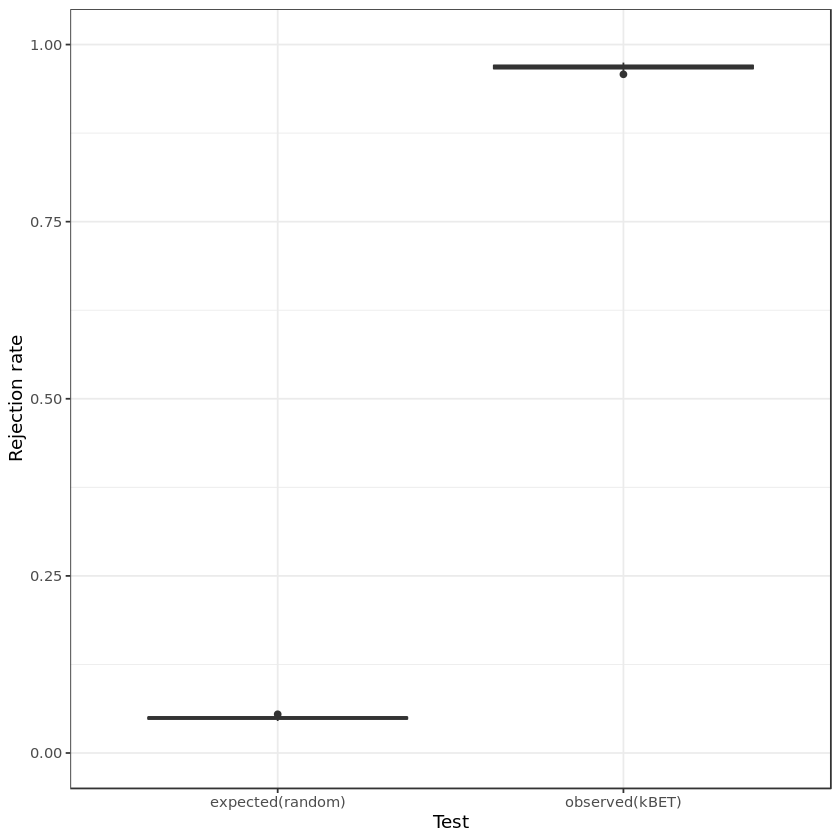

finding knns...done. Time:
   user  system elapsed 
 23.688   0.052  23.744 
No outsiders found.

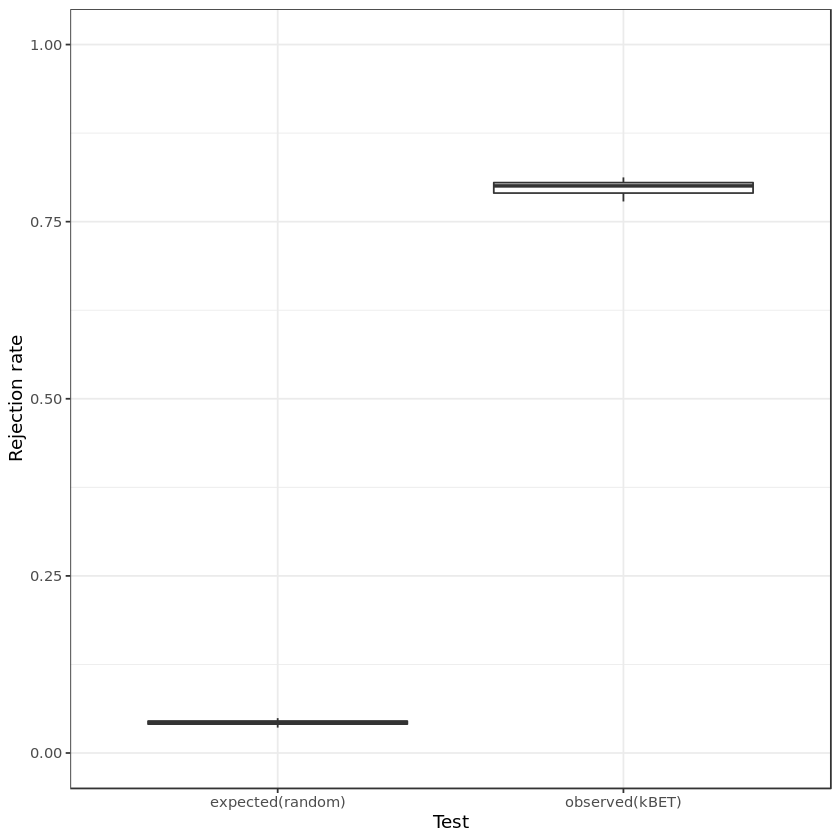

finding knns...done. Time:
   user  system elapsed 
 23.029   0.052  23.085 


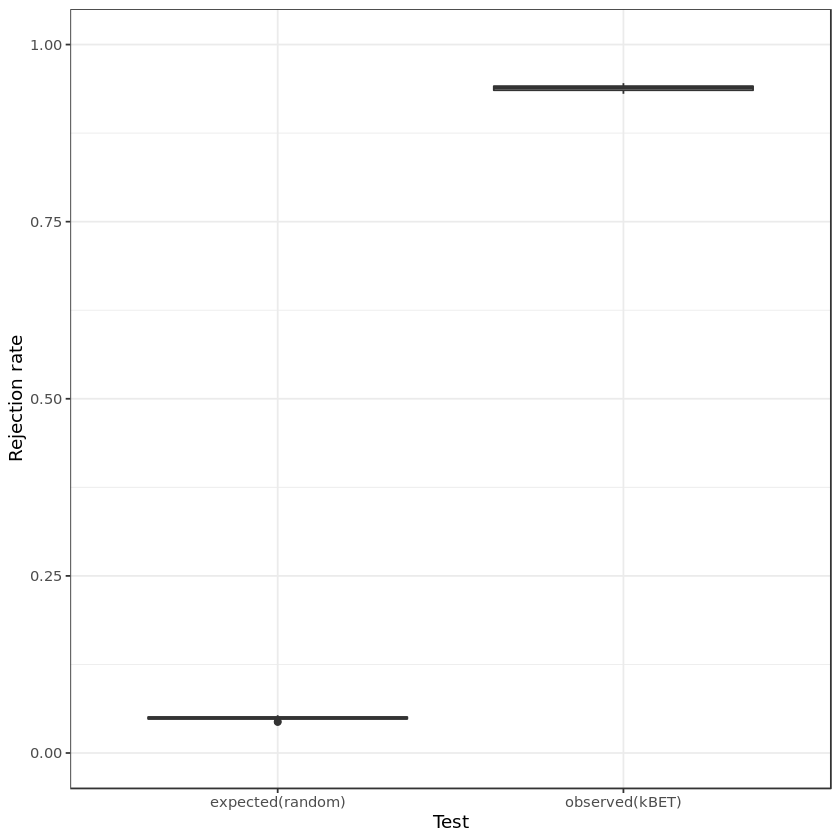

finding knns...done. Time:
   user  system elapsed 
 24.655   0.052  24.712 
No outsiders found.

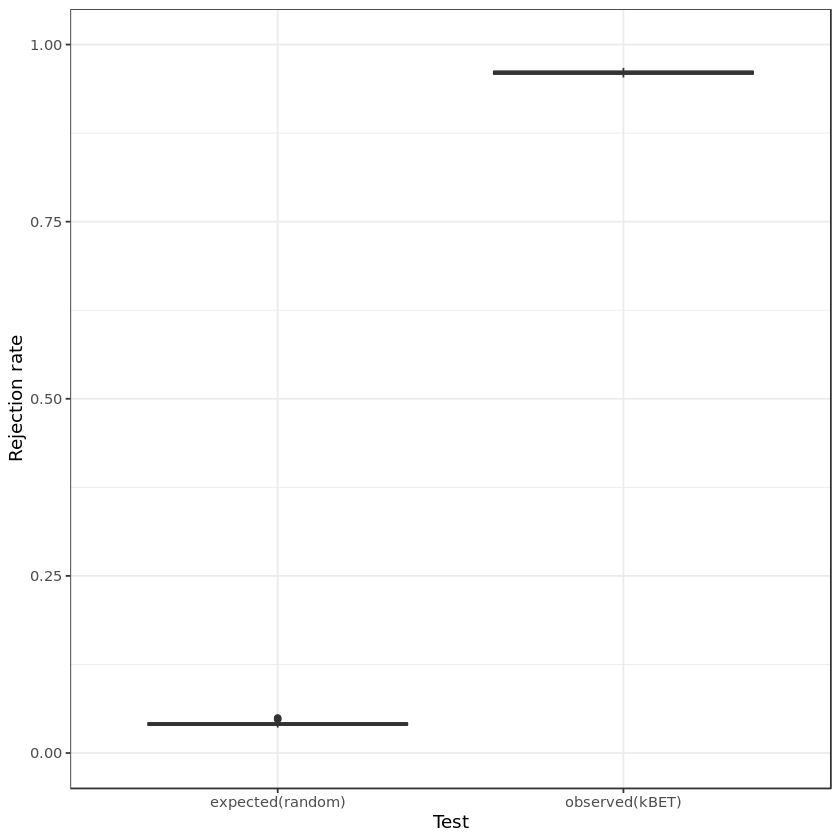

finding knns...done. Time:
   user  system elapsed 
 24.165   0.064  24.234 
No outsiders found.

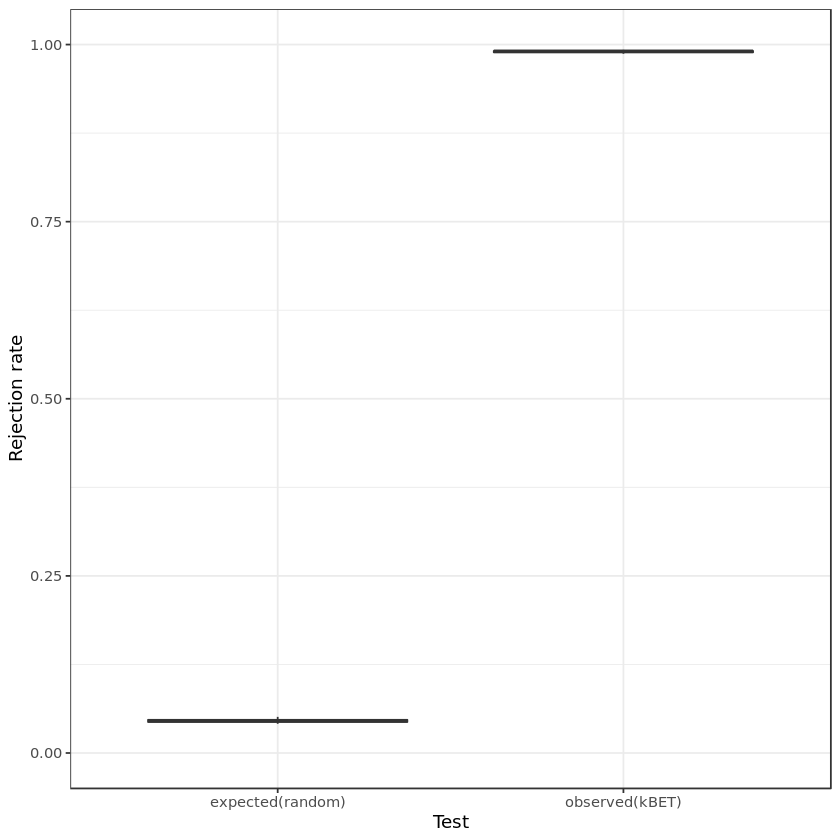

finding knns...done. Time:
   user  system elapsed 
 25.253   0.052  25.311 


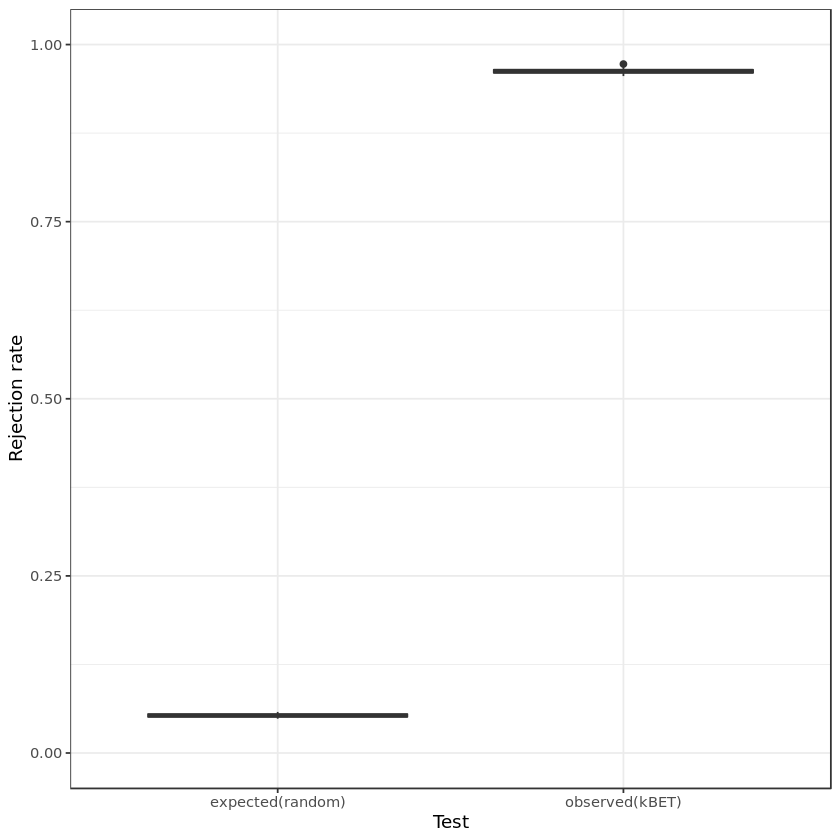

finding knns...done. Time:
   user  system elapsed 
 24.929   0.052  24.986 


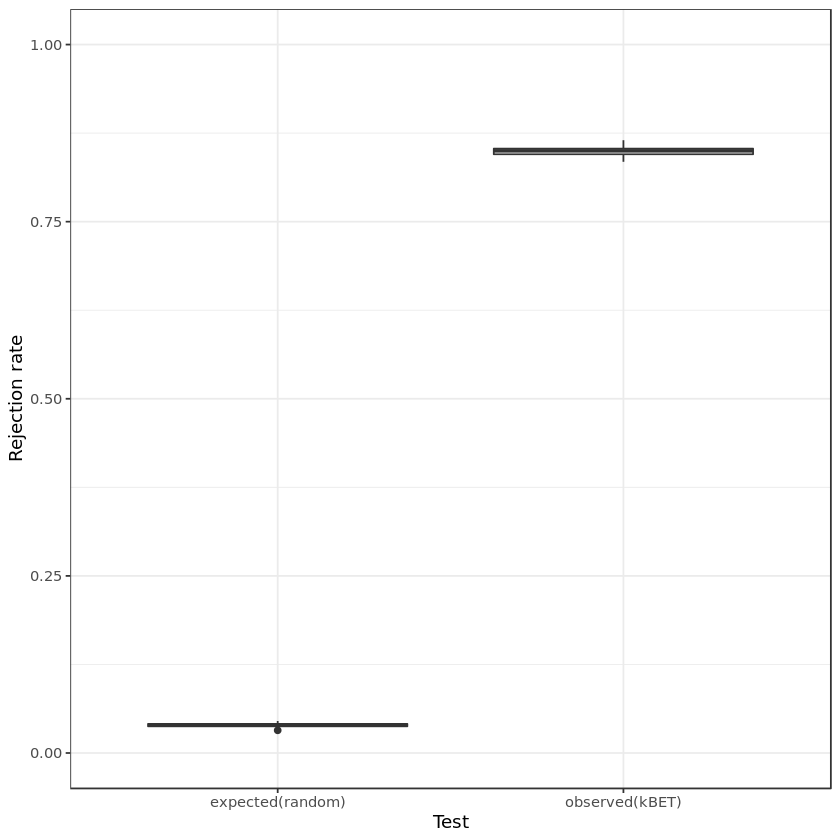

finding knns...done. Time:
   user  system elapsed 
 24.310   0.048  24.363 
No outsiders found.

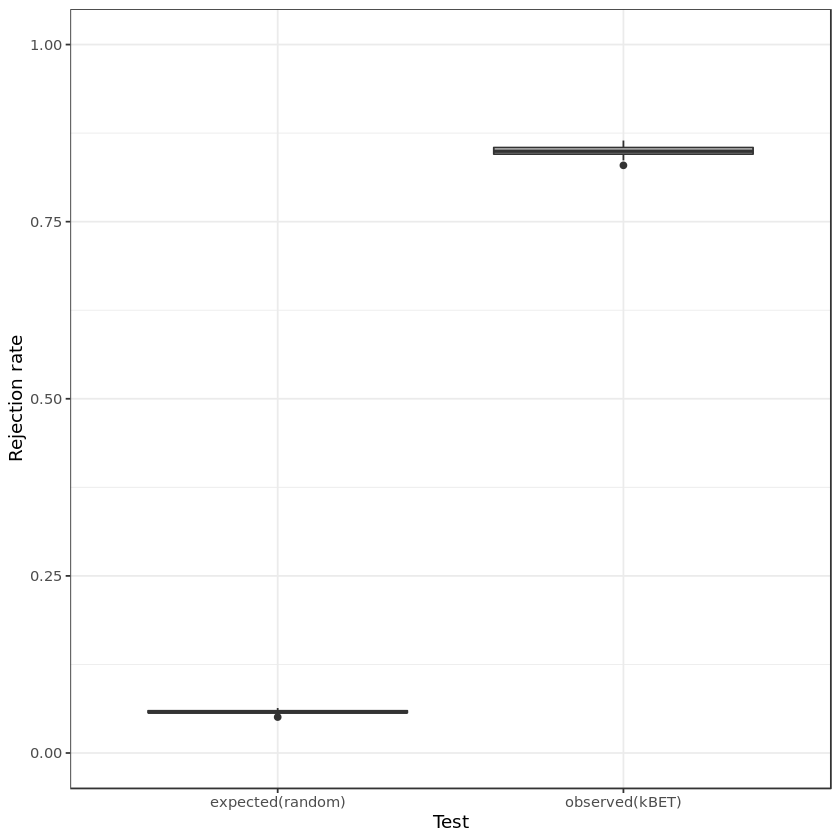

finding knns...done. Time:
   user  system elapsed 
 25.448   0.044  25.497 


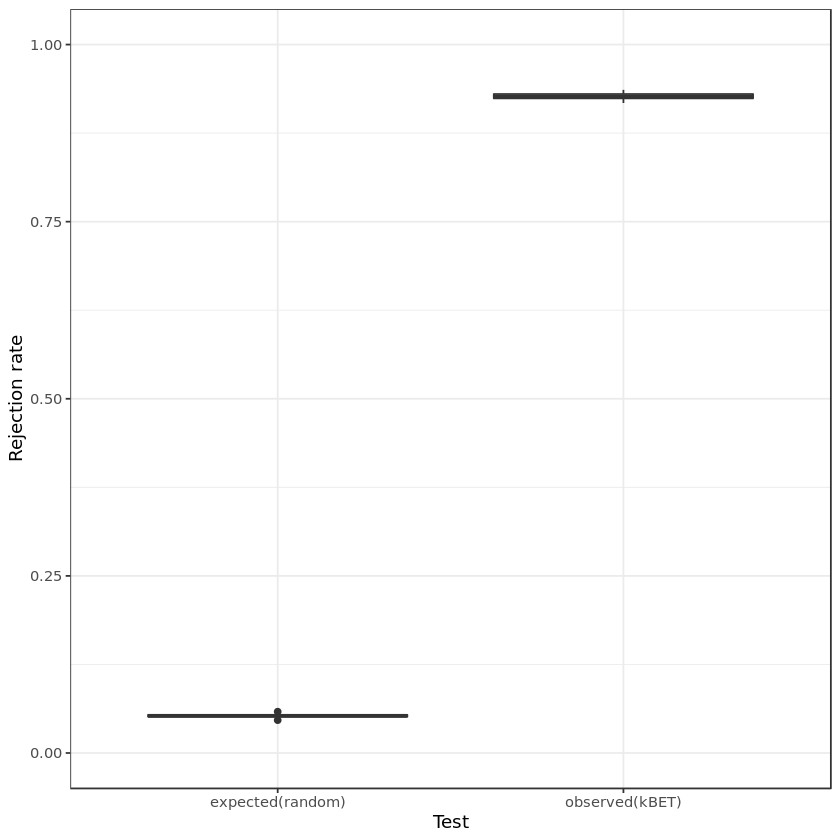

finding knns...done. Time:
   user  system elapsed 
 22.199   0.052  22.254 
No outsiders found.

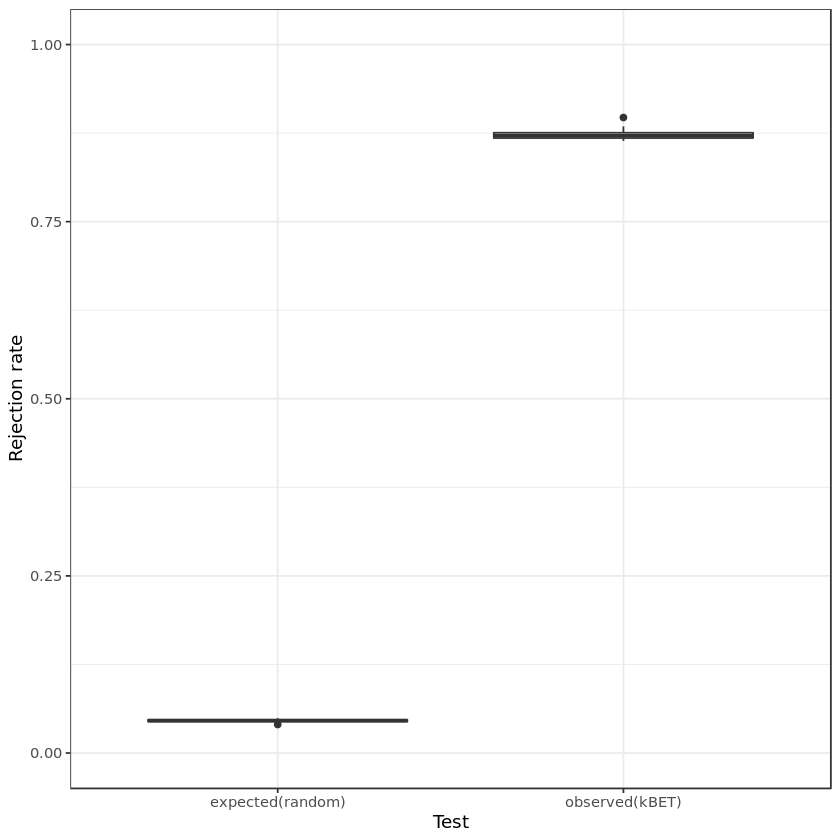

finding knns...done. Time:
   user  system elapsed 
 25.910   0.052  25.967 
No outsiders found.

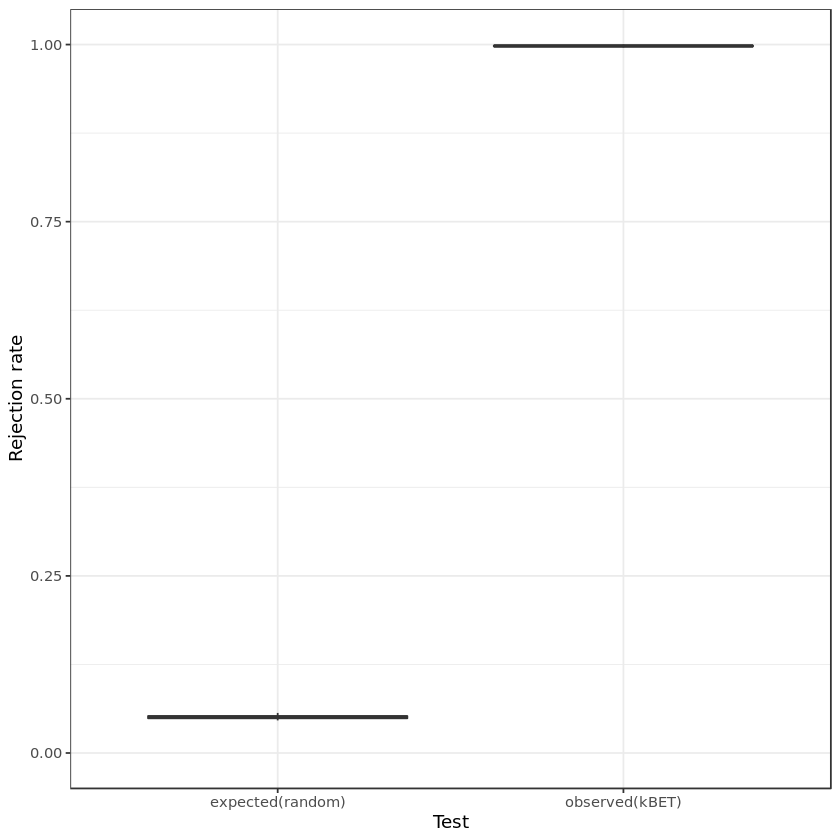

finding knns...done. Time:
   user  system elapsed 
 24.400   0.048  24.453 


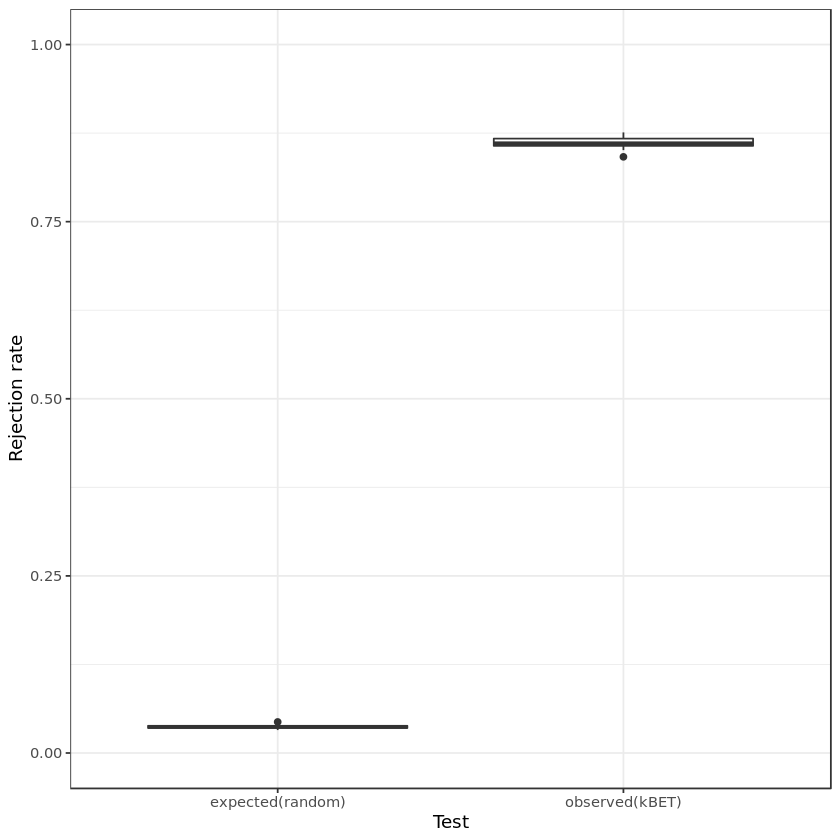

finding knns...done. Time:
   user  system elapsed 
 24.576   0.044  24.625 


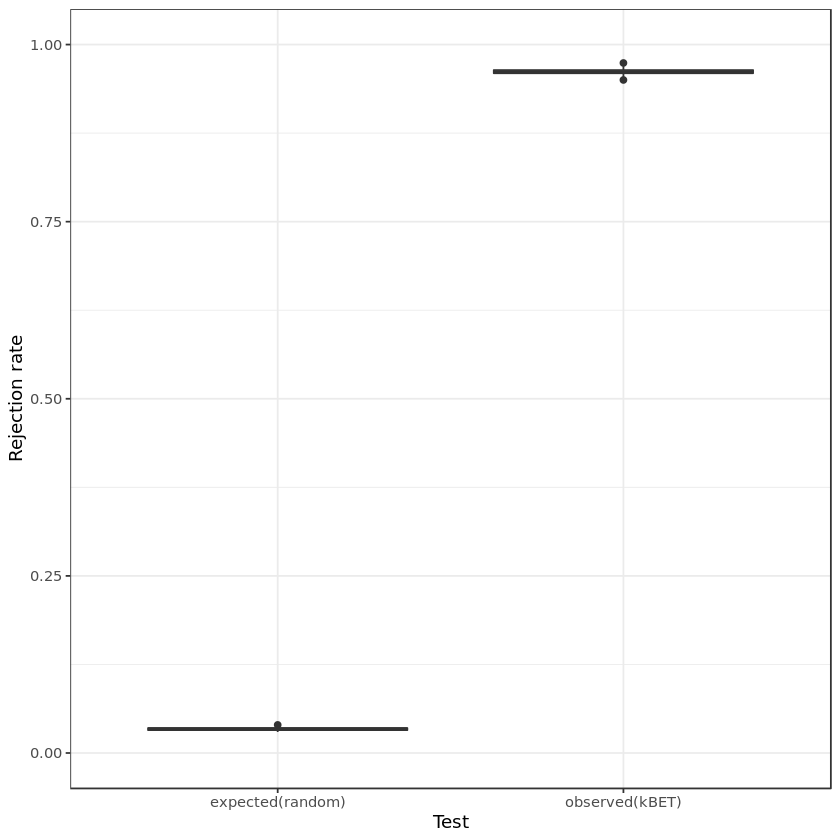

finding knns...done. Time:
   user  system elapsed 
 23.575   0.048  23.627 
No outsiders found.

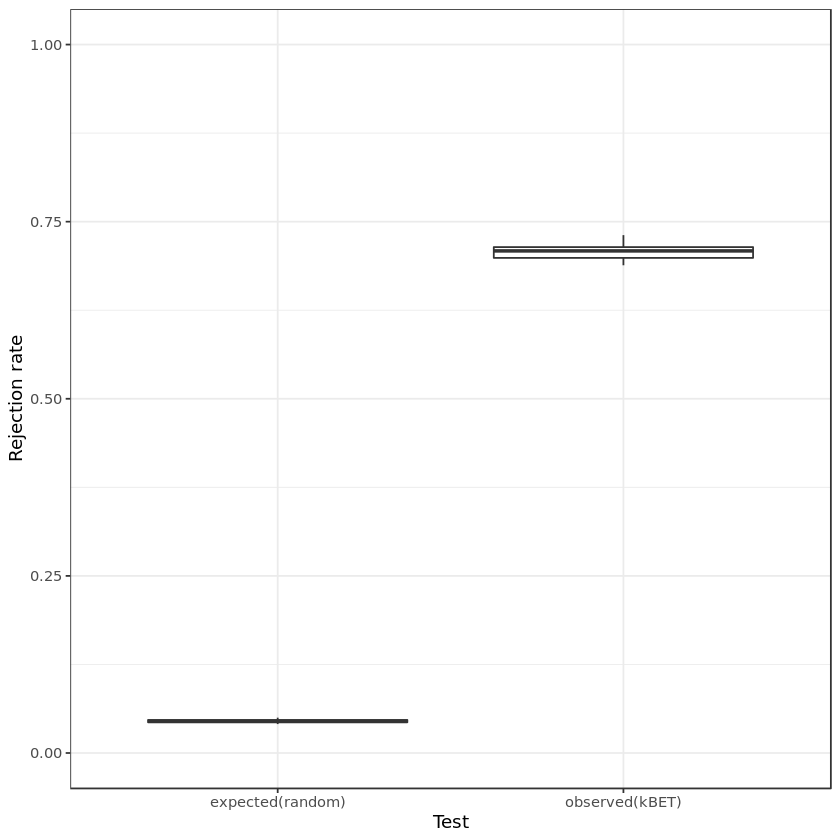

finding knns...done. Time:
   user  system elapsed 
 22.320   0.048  22.372 


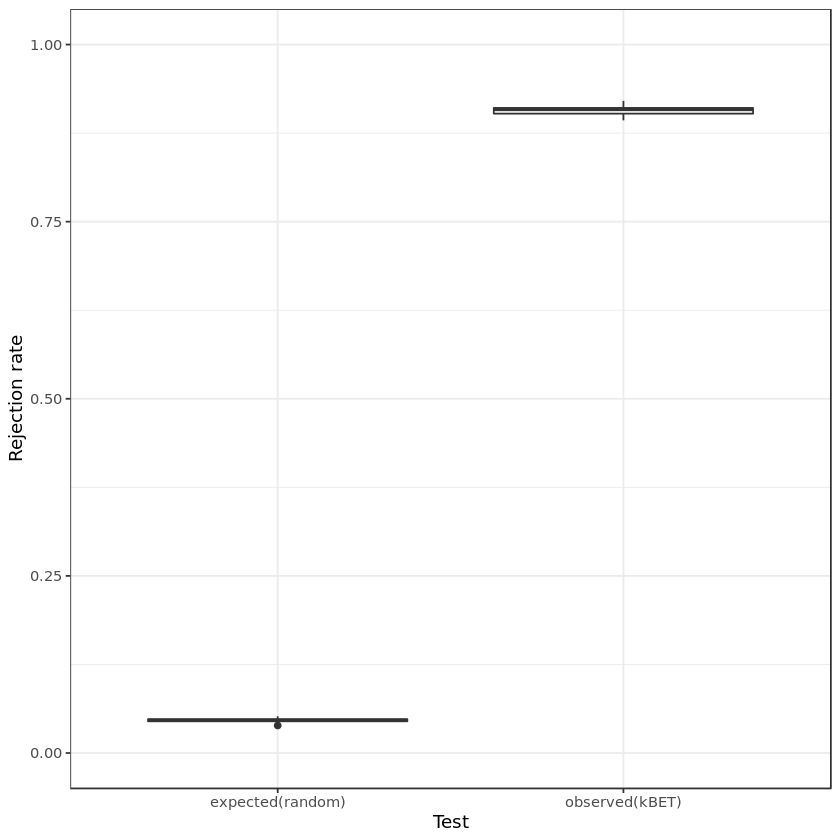

finding knns...done. Time:
   user  system elapsed 
 22.777   0.048  22.830 


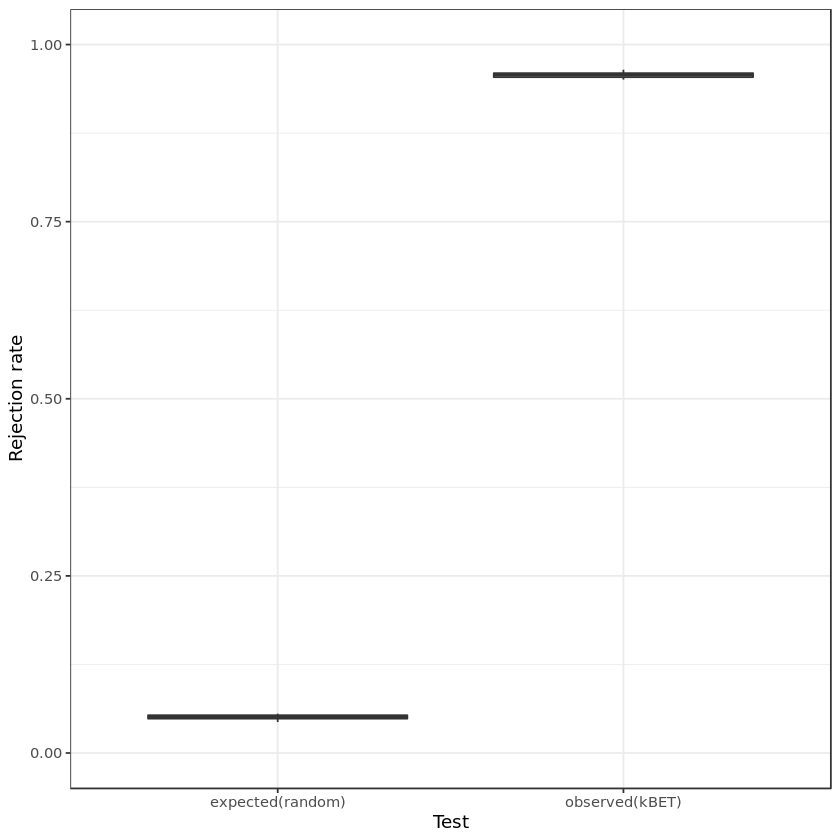

finding knns...done. Time:
   user  system elapsed 
 21.845   0.052  21.901 


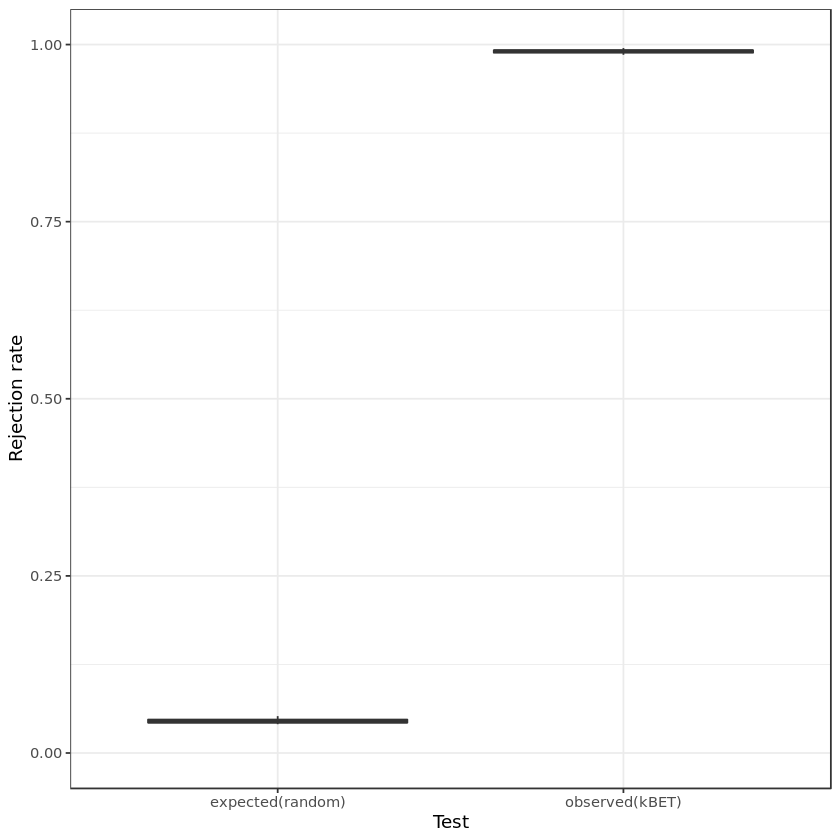

finding knns...done. Time:
   user  system elapsed 
 24.283   0.056  24.343 


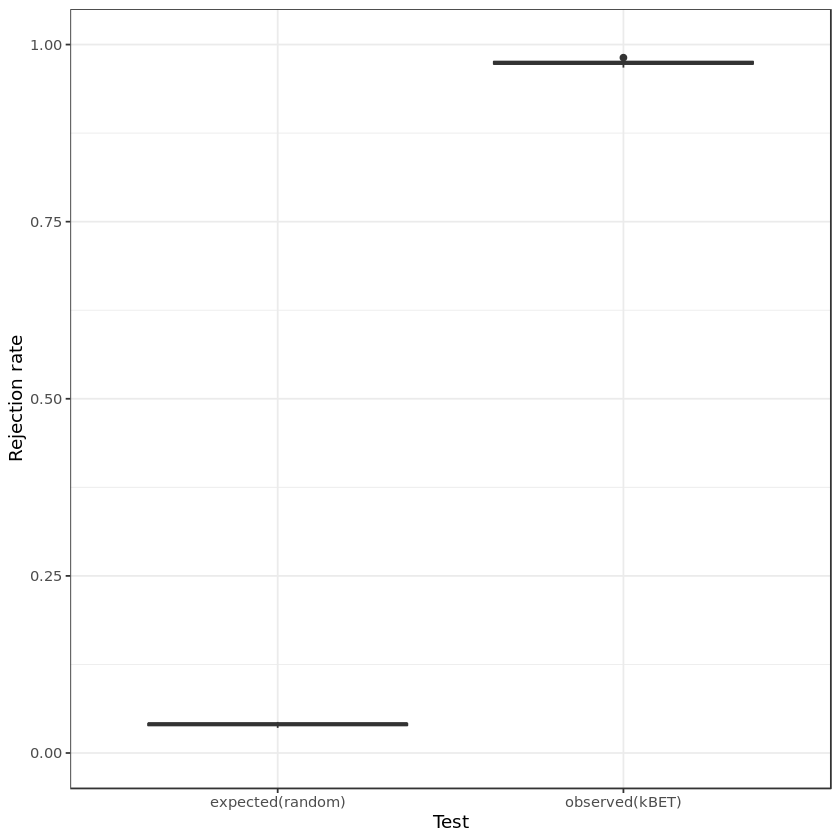

finding knns...done. Time:
   user  system elapsed 
 24.435   0.048  24.488 
No outsiders found.

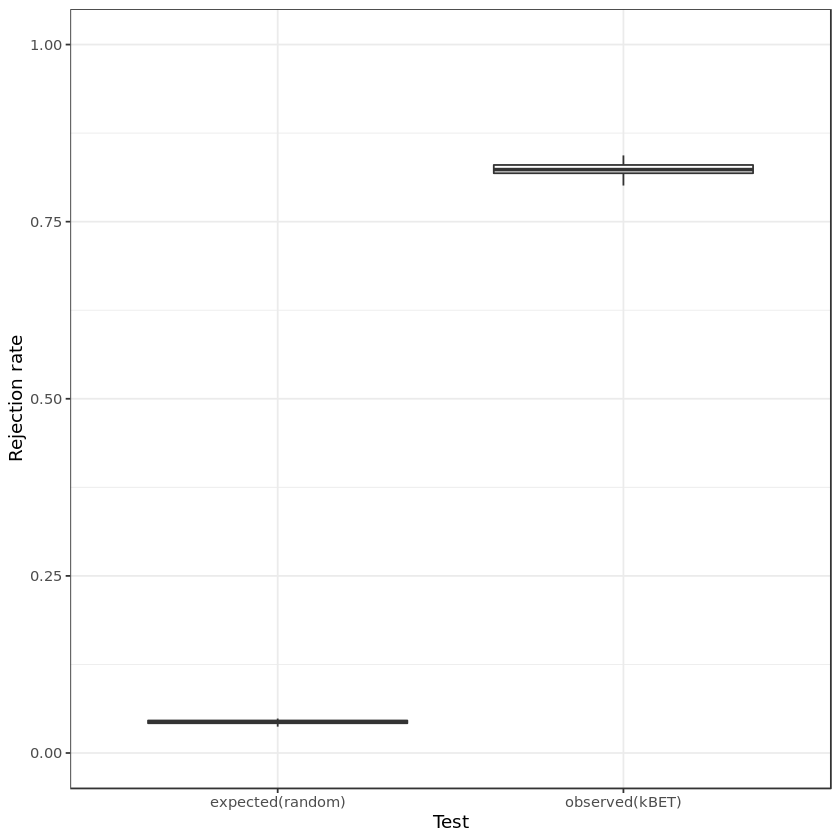

finding knns...done. Time:
   user  system elapsed 
 23.347   0.056  23.407 


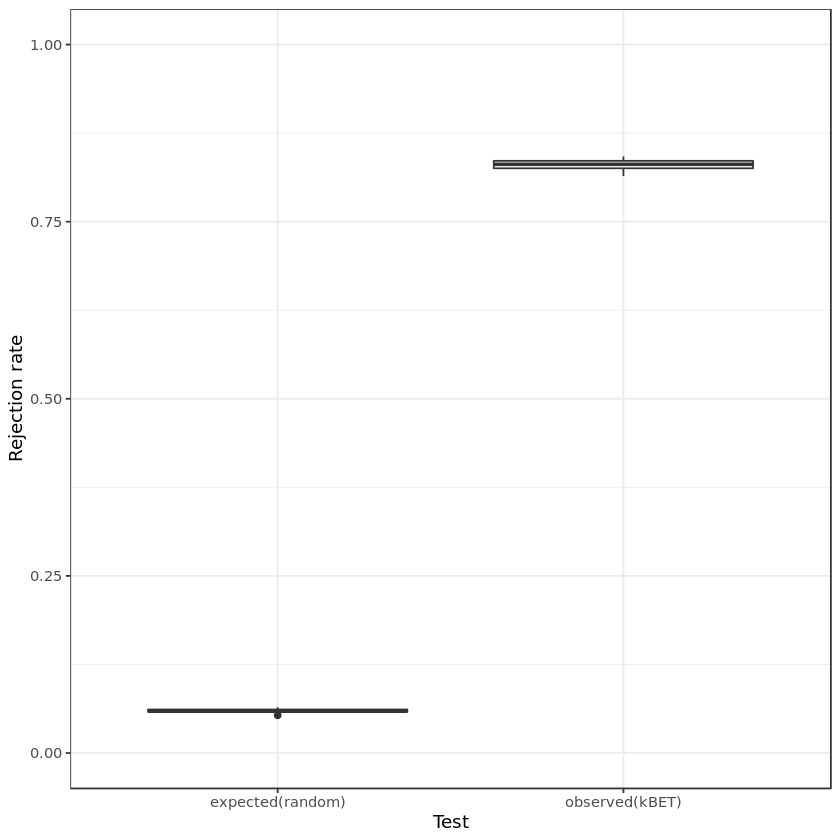

finding knns...done. Time:
   user  system elapsed 
 25.331   0.048  25.383 


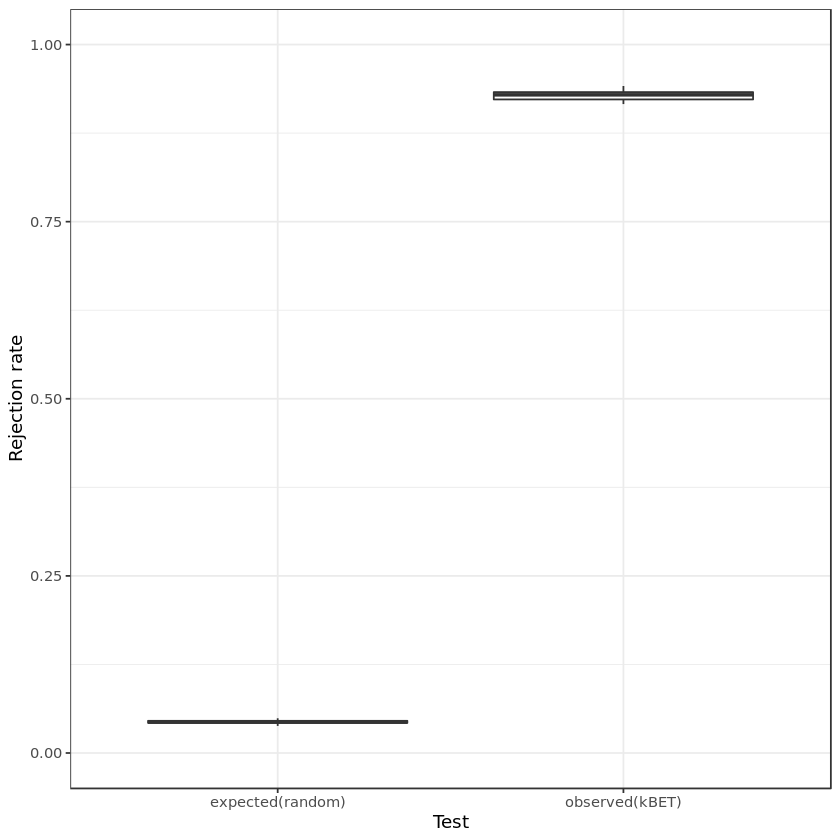

finding knns...done. Time:
   user  system elapsed 
 22.982   0.052  23.038 


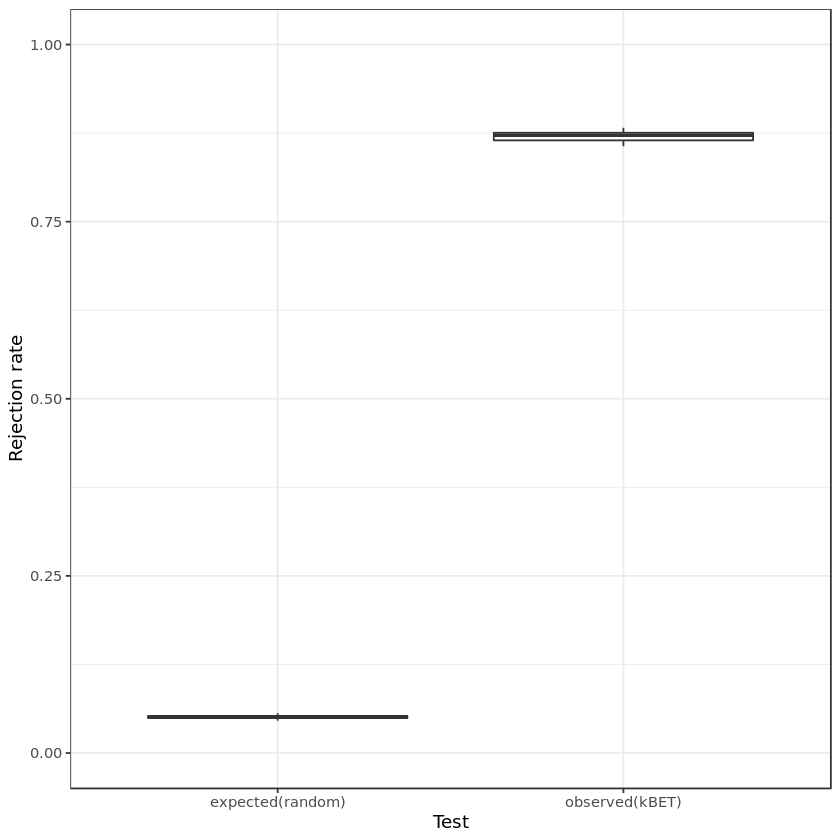

finding knns...done. Time:
   user  system elapsed 
 26.403   0.052  26.460 


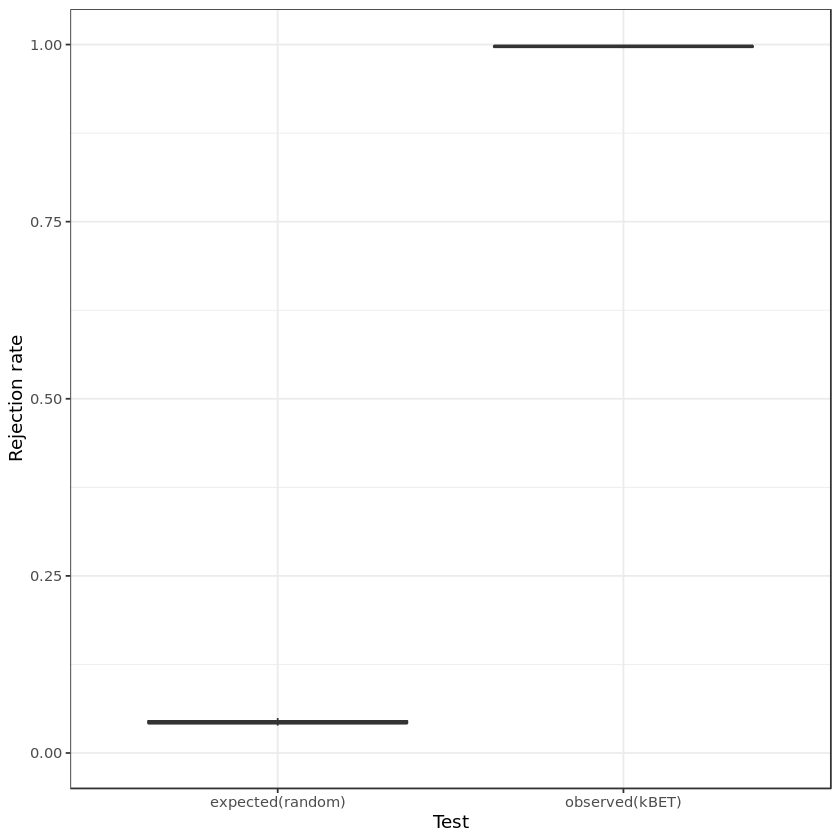

finding knns...done. Time:
   user  system elapsed 
 24.228   0.048  24.280 


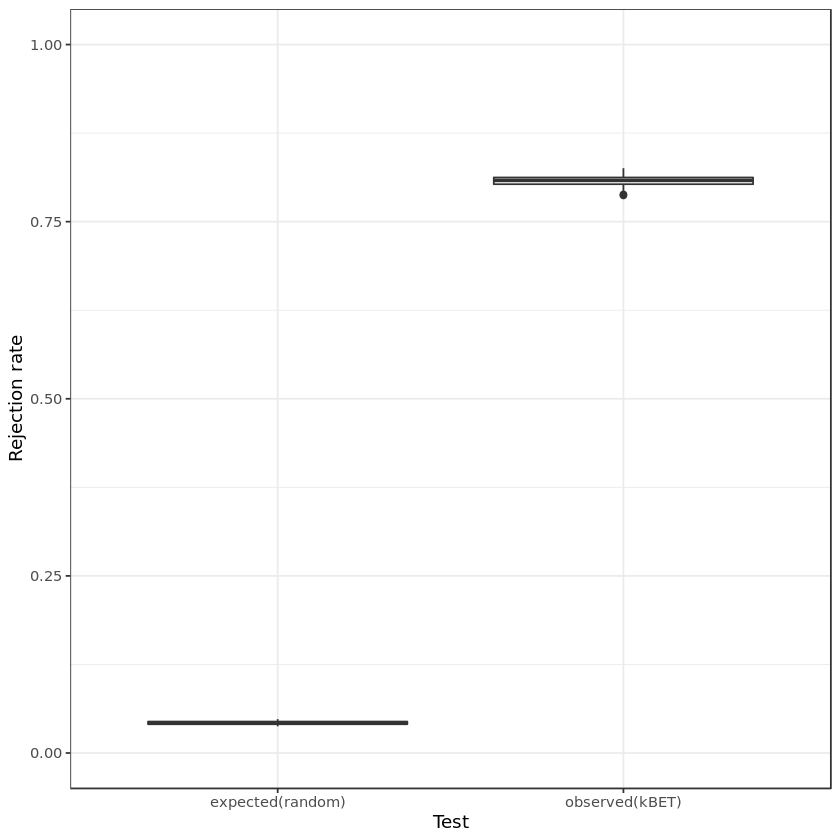

finding knns...done. Time:
   user  system elapsed 
 23.902   0.036  23.943 


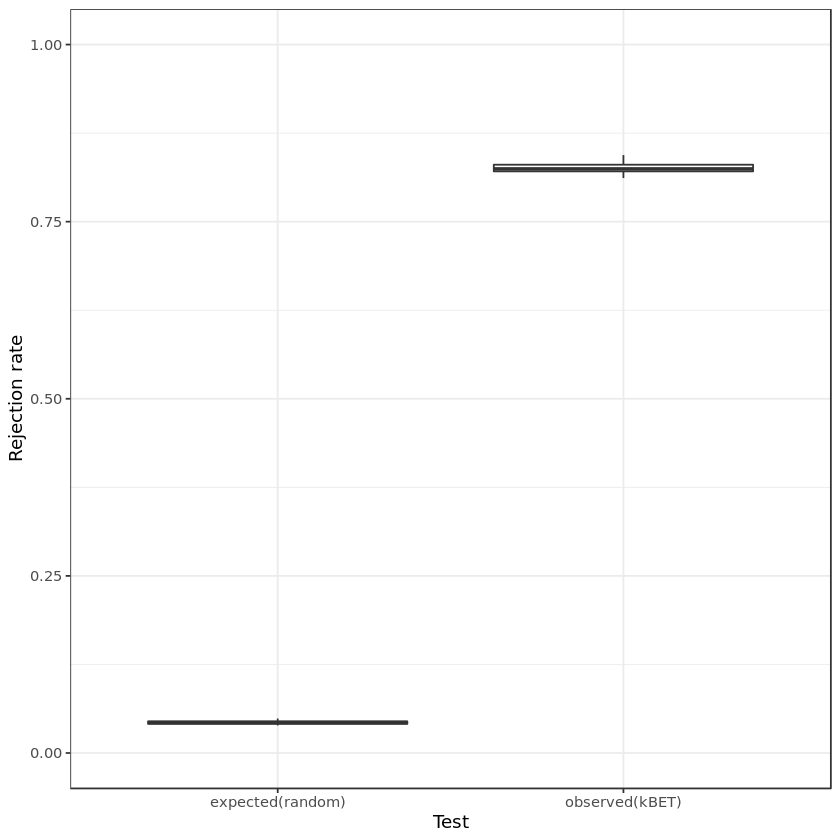

finding knns...done. Time:
   user  system elapsed 
 24.462   0.068  24.534 


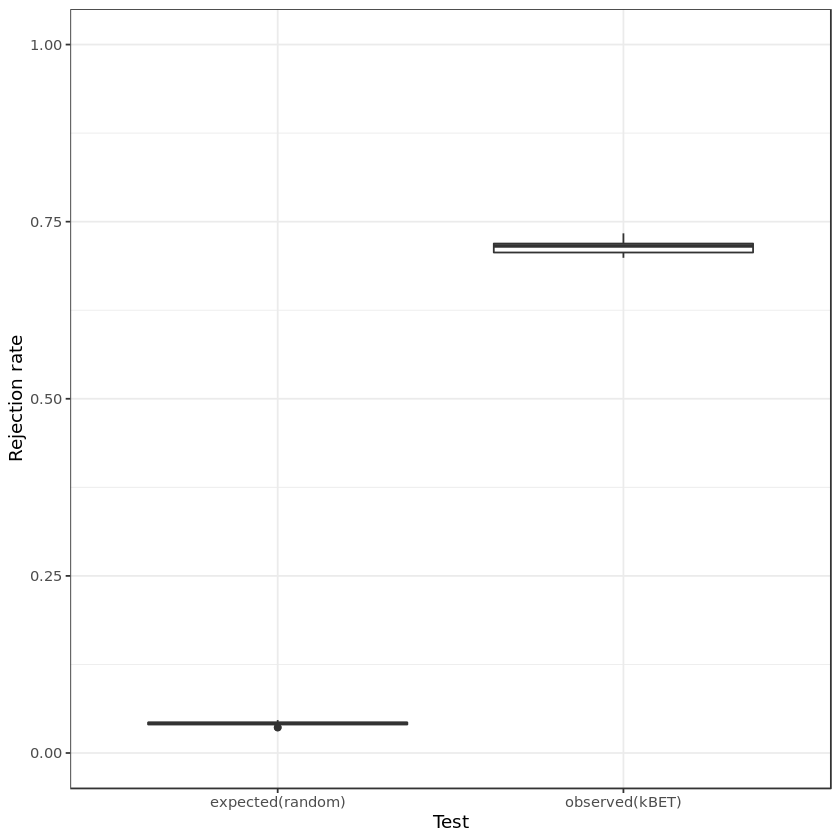

finding knns...done. Time:
   user  system elapsed 
 24.605   0.052  24.661 


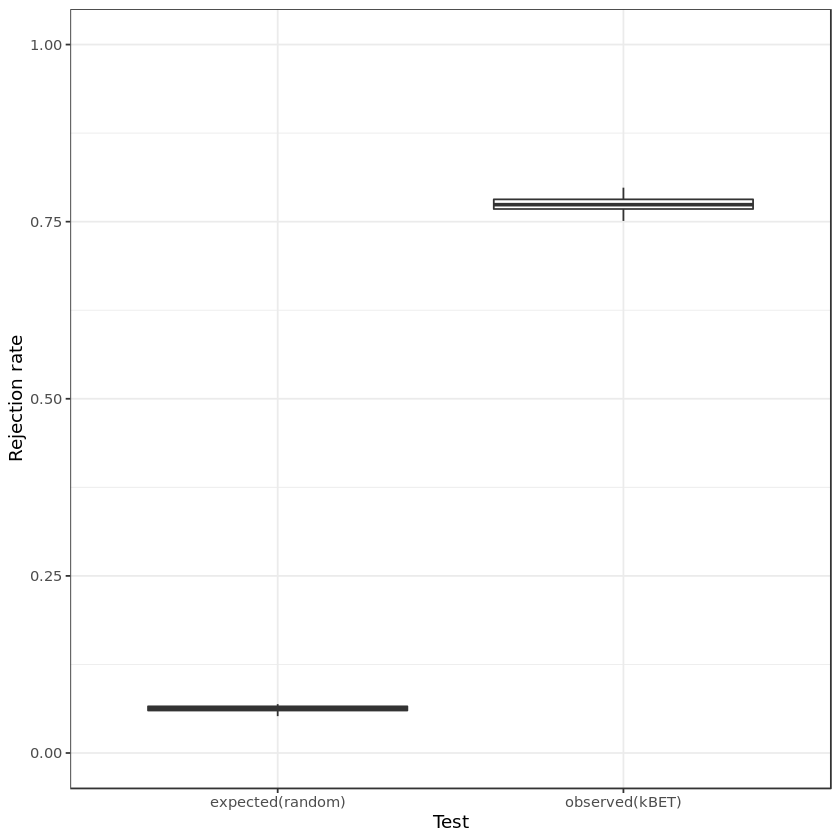

finding knns...done. Time:
   user  system elapsed 
 24.787   0.056  24.847 


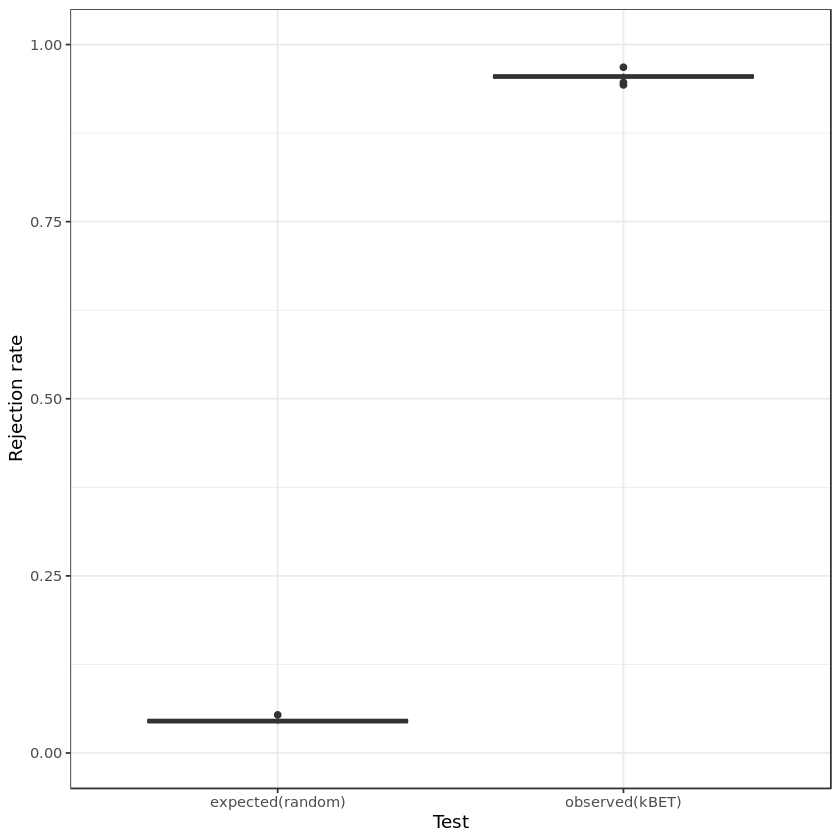

finding knns...done. Time:
   user  system elapsed 
 25.344   0.052  25.401 


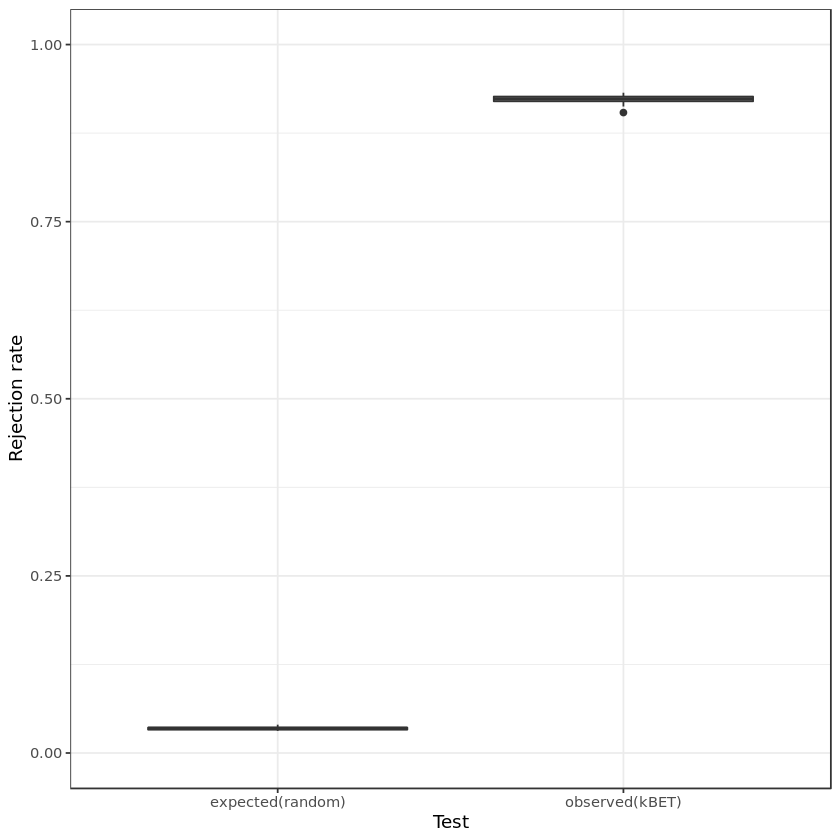

finding knns...done. Time:
   user  system elapsed 
 24.407   0.036  24.447 


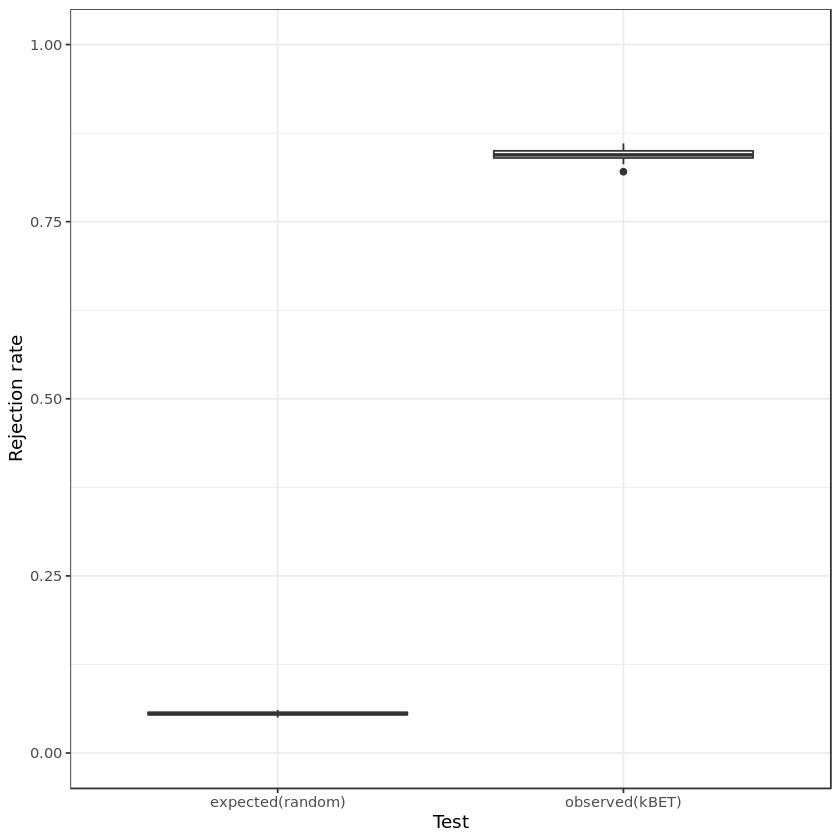

finding knns...done. Time:
   user  system elapsed 
 24.085   0.060  24.151 


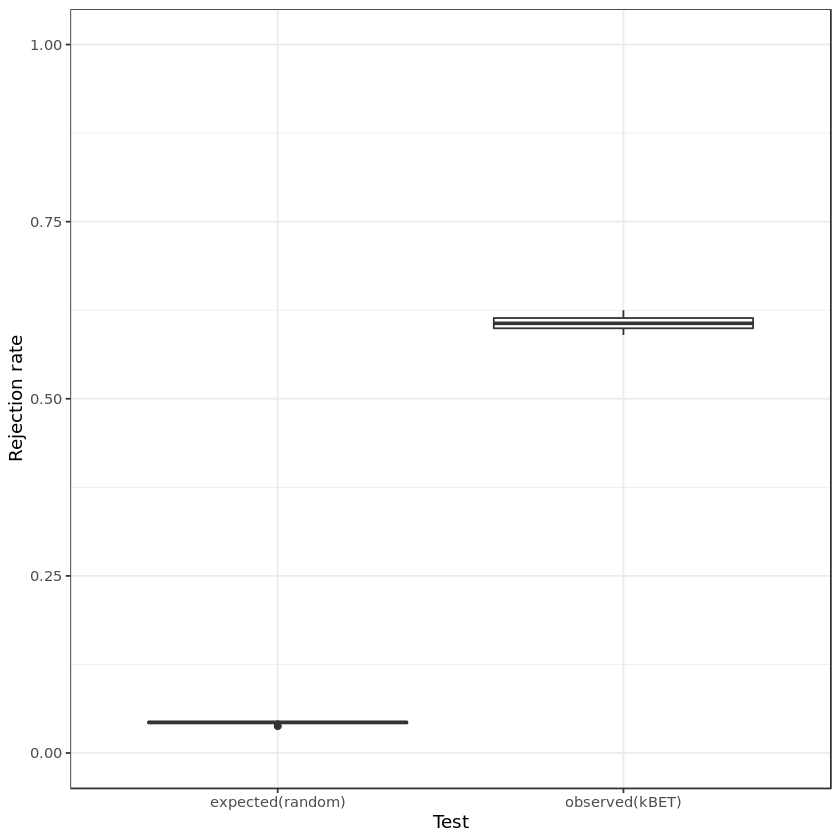

finding knns...done. Time:
   user  system elapsed 
 25.075   0.056  25.136 


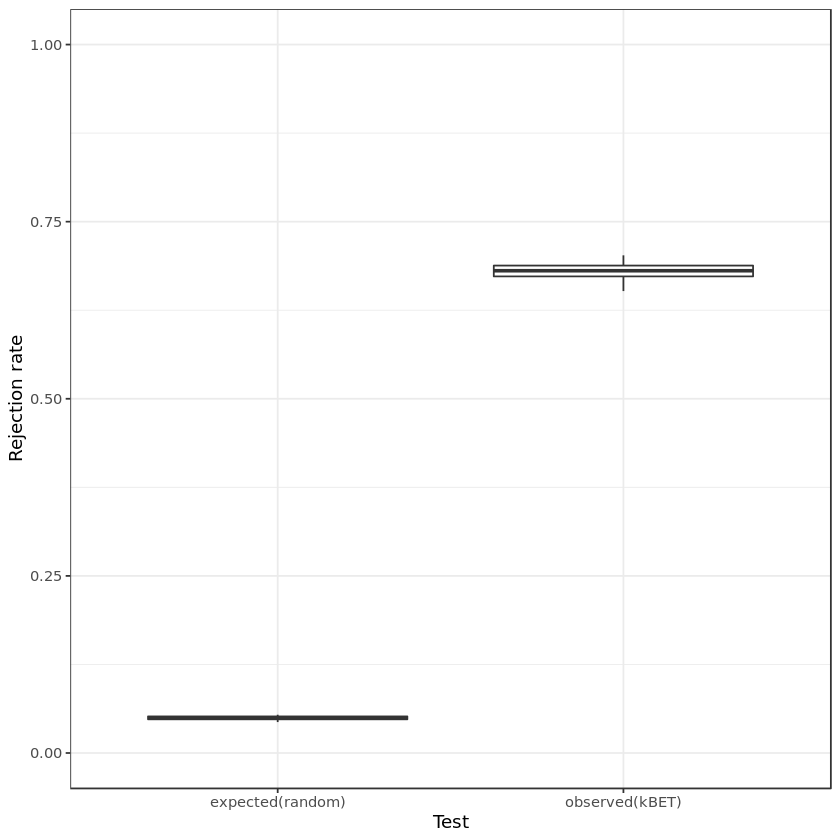

finding knns...done. Time:
   user  system elapsed 
 24.955   0.048  25.008 


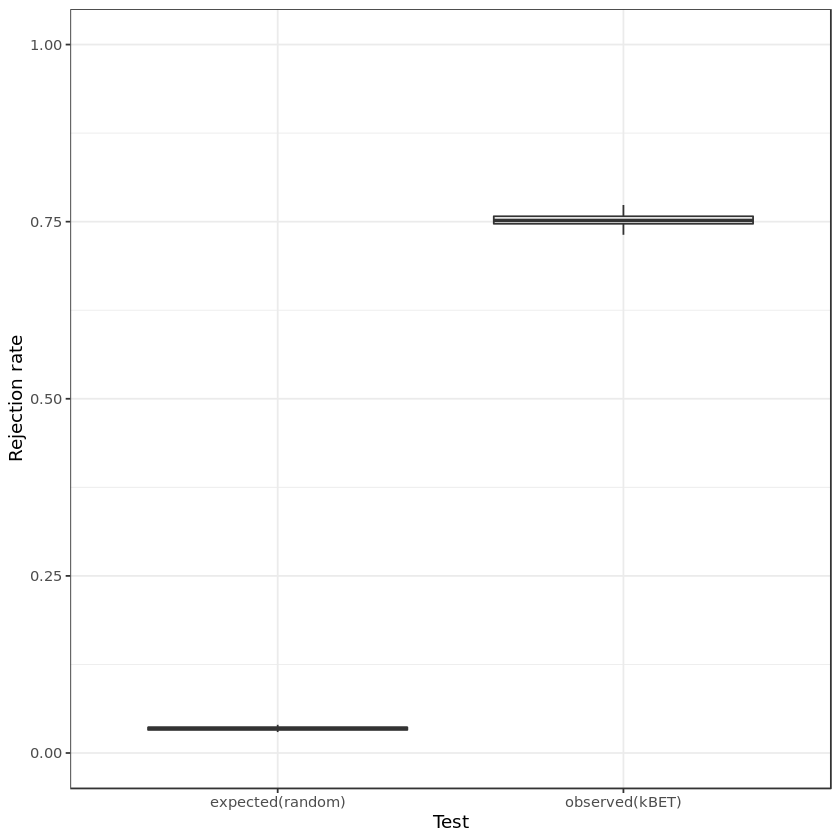

finding knns...done. Time:
   user  system elapsed 
 25.825   0.048  25.877 
No outsiders found.

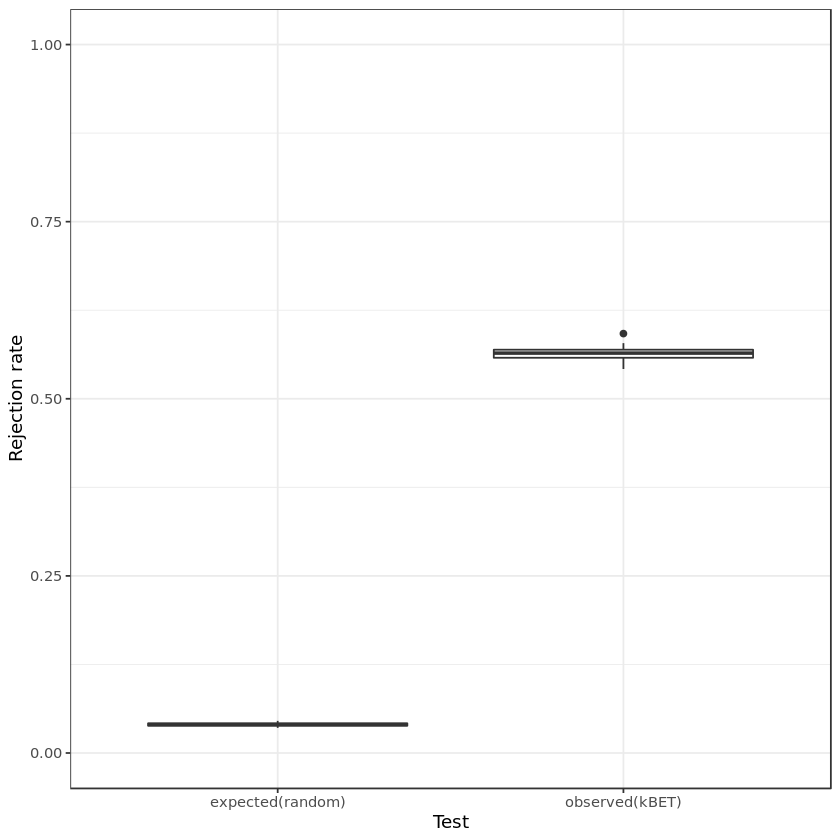

finding knns...done. Time:
   user  system elapsed 
 25.721   0.056  25.782 


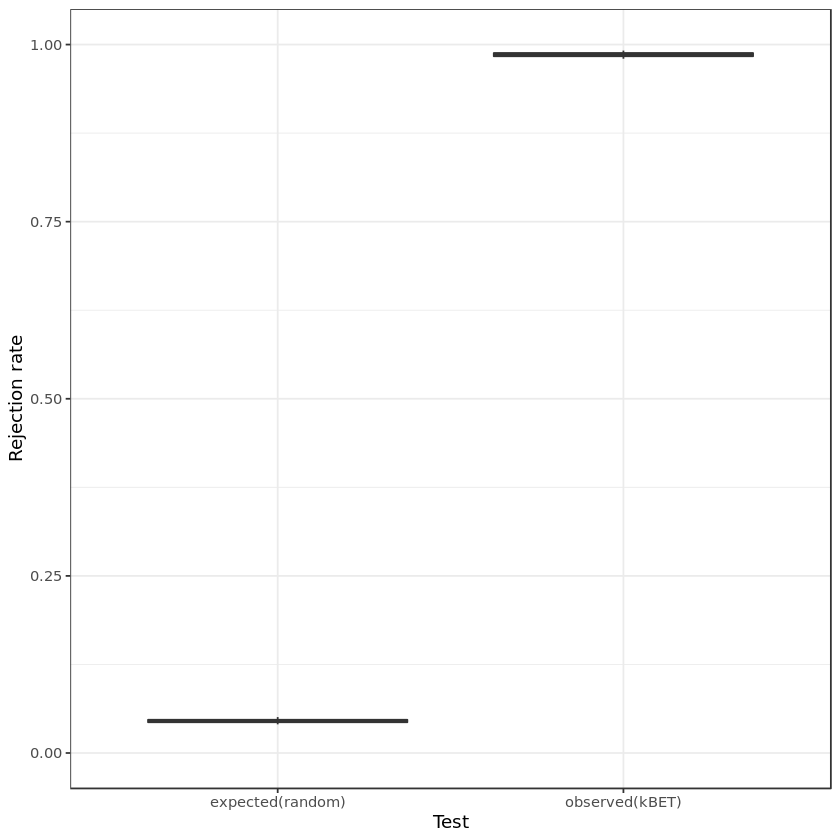

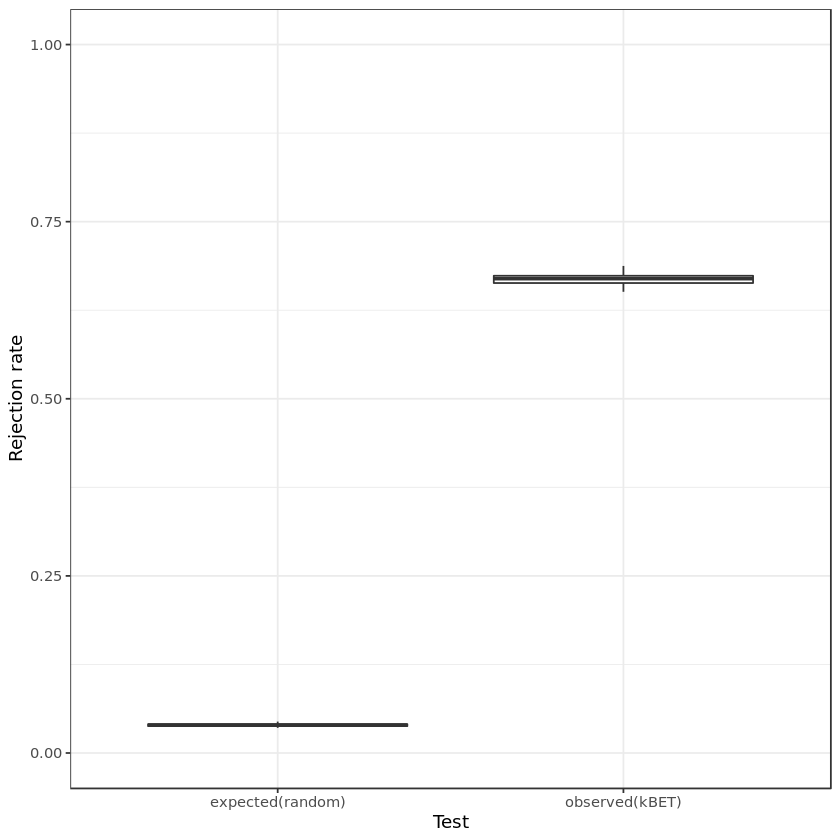

In [17]:
kBET.data.uncorrected.well =  test_by_well(data.uncorrected, size=20000, k=500, testsize=2000)
kBET.data.plate.well = test_by_well(data.plate, size=20000, k=500, testsize=2000)
kBET.data.well.well = test_by_well(data.well, size=20000, k=500, testsize=2000)
#nrow(data_subset)

In [242]:
test_by_well_and_batch <- function(data, size, k, testsize){
    kBET_out_list = list()
    
    subsets = unique(data.uncorrected$Subset)
    #print('got subsets')
    
    for (subset in subsets){
        
        print(sprintf('working on subset: %s', subset))
        #print('filtering...')
        data_subset = data %>% filter(Subset == subset)
        #print('filtered')
        
        #print(nrow(data_subset))
        
        sample_indices = sample.int(n = nrow(data_subset), size = min( c(size , nrow(data_subset) ) ), replace=FALSE)
        subsample = data_subset[sample_indices, ]
        subsample = subsample %>% unite(Metadata_Well_Plate_Batch, Metadata_Plate, Metadata_Well, sep='_', remove=FALSE)
        
        subsample.batch = subsample$Metadata_Well_Plate_Batch
     
        #print(k)
        
        kBET_well = kBET(subsample %>% select(-c(all_of(metadata_cols), Subset, Metadata_Well_Plate_Batch)), subsample.batch, k0 = k, 
            knn = NULL, testSize=testsize, do.pca=FALSE, dim.pca = 4, heuristic = FALSE, n_repeat = 50,
            alpha = 0.05, addTest = FALSE, verbose = TRUE, plot = FALSE,
            adapt = TRUE)
        
        kBET_out_list[[subset]] = kBET_well
    }
    return(kBET_out_list)
}

In [243]:
t.start2 = Sys.time()
print(t.start2)
#-----------
kBET.data.uncorrected.well.plate =  test_by_well_and_batch(data.uncorrected, size=2000, k=500, testsize=1000)
kBET.data.plate.well.plate = test_by_well_and_batch(data.plate, size=2000, k=500, testsize=1000)
kBET.data.well.well.plate = test_by_well_and_batch(data.well, size=2000, k=500, testsize=1000)
#-----------
elapsed2 = Sys.time() - t.start2
print(elapsed2)

[1] "2020-08-05 19:13:58 UTC"
[1] "working on subset: WT_0"
finding knns...done. Time:
   user  system elapsed 
  0.850   0.000   0.851 
[1] "working on subset: CloneA_0"
finding knns...done. Time:
   user  system elapsed 
  0.819   0.000   0.819 
[1] "working on subset: CloneE_0"
finding knns...done. Time:
   user  system elapsed 
  0.824   0.000   0.824 
[1] "working on subset: WT_0.7"
finding knns...done. Time:
   user  system elapsed 
  0.796   0.000   0.796 
[1] "working on subset: CloneA_0.7"
finding knns...done. Time:
   user  system elapsed 
  0.816   0.000   0.816 
[1] "working on subset: CloneE_0.7"
finding knns...done. Time:
   user  system elapsed 
  0.821   0.000   0.822 
[1] "working on subset: WT_7"
finding knns...done. Time:
   user  system elapsed 
  0.819   0.000   0.819 
[1] "working on subset: CloneA_7"
finding knns...done. Time:
   user  system elapsed 
  0.815   0.000   0.815 
[1] "working on subset: CloneE_7"
finding knns...done. Time:
   user  system elapsed 
  

In [237]:
kBET.observed.uncorrected.well.mean = 0
for(result in kBET.data.uncorrected.well.plate){
    kBET.observed.uncorrected.well.mean = kBET.observed.uncorrected.well.mean + 
        result$summary$kBET.observed[1]
}
kBET.observed.uncorrected.well.mean = kBET.observed.uncorrected.well.mean/12
print(sprintf("Tested by well, uncorrected: %s", kBET.observed.uncorrected.well.mean))

kBET.observed.plate.well.mean = 0
for(result in kBET.data.plate.well.plate){
    kBET.observed.plate.well.mean = kBET.observed.plate.well.mean + 
        result$summary$kBET.observed[1]
}
kBET.observed.plate.well.mean = kBET.observed.plate.well.mean/12
print(sprintf("Tested by well, corrected by plate: %s", kBET.observed.plate.well.mean))

kBET.observed.well.well.mean = 0
for(result in kBET.data.well.well.plate){
    kBET.observed.well.well.mean = kBET.observed.well.well.mean + 
        result$summary$kBET.observed[1]
}
kBET.observed.well.well.mean = kBET.observed.well.well.mean/12
print(sprintf("Tested by well, corrected by plate + well: %s", kBET.observed.well.well.mean))

[1] "Tested by well, uncorrected: 0.961889166666667"
[1] "Tested by well, corrected by plate: 0.948785833333333"
[1] "Tested by well, corrected by plate + well: 0.9280525"


In [87]:
print("Uncorrected Data: Well Effect ")

for(result in c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)){
    sub_names = names(kBET.data.uncorrected.well)
    print(sub_names[result])

    print(kBET.data.uncorrected.well[[result]]$summary[1,])

    #print(str(result[i]$results))
    #print(str(result[i]$stats))
    #print(str(result[i]$average.pval))
    #print(str(result[i]$params))
}

print("Plate Corrected Data: Well Effect")

for(result in c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)){
    sub_names = names(kBET.data.plate.well)
    print(sub_names[result])
    
    print(kBET.data.plate.well[[result]]$summary[1,])

    #print(str(result[i]$results))
    #print(str(result[i]$stats))
    #print(str(result[i]$average.pval))
    #print(str(result[i]$params))
}

print("Plate + Well Corrected Data: Well Effect")

for(result in c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)){
    sub_names = names(kBET.data.well.well)
    print(sub_names[result])
    
    print(kBET.data.well.well[[result]]$summary[1,])

    #print(str(result[i]$results))
    #print(str(result[i]$stats))
    #print(str(result[i]$average.pval))
    #print(str(result[i]$params))
}

[1] "Uncorrected Data: Well Effect "
[1] "WT_0"
     kBET.expected kBET.observed kBET.signif
mean    0.04938333     0.9679625           0
[1] "CloneA_0"
     kBET.expected kBET.observed kBET.signif
mean      0.042975     0.7982375           0
[1] "CloneE_0"
     kBET.expected kBET.observed kBET.signif
mean    0.04937083      0.938425           0
[1] "WT_0.7"
     kBET.expected kBET.observed kBET.signif
mean    0.04108333      0.960075           0
[1] "CloneA_0.7"
     kBET.expected kBET.observed kBET.signif
mean      0.045475     0.9899875           0
[1] "CloneE_0.7"
     kBET.expected kBET.observed kBET.signif
mean     0.0528875     0.9621125           0
[1] "WT_7"
     kBET.expected kBET.observed kBET.signif
mean    0.03897917     0.8494375           0
[1] "CloneA_7"
     kBET.expected kBET.observed kBET.signif
mean    0.05815417     0.8495125           0
[1] "CloneE_7"
     kBET.expected kBET.observed kBET.signif
mean    0.05239167      0.927075           0
[1] "WT_70"
     kBET.ex

In [82]:
write.csv(kBET.plate.full$summary, "kBET_Plate_Corrected_Batch_Plate_Summary.csv")
write.csv(kBET.plate.full$results, "kBET_Plate_Corrected_Batch_Plate_Results.csv")
write.csv(kBET.plate.full$average.pval, "kBET_Plate_Corrected_Batch_Plate_Pval.csv")
write.csv(kBET.plate.full$params, "kBET_Plate_Corrected_Batch_Plate_Params.csv")
write.csv(kBET.plate.full$stats, "kBET_Plate_Corrected_Batch_Plate_Stats.csv")

write.csv(kBET.uncorrected.full$summary, "kBET_Uncorrected_Batch_Plate_Summary.csv")
write.csv(kBET.uncorrected.full$results, "kBET_Uncorrected_Batch_Plate_Results.csv")
write.csv(kBET.uncorrected.full$average.pval, "kBET_Unorrected_Batch_Plate_Pval.csv")
write.csv(kBET.uncorrected.full$params, "kBET_Uncorrected_Batch_Plate_Params.csv")
write.csv(kBET.uncorrected.full$stats, "kBET_Uncorrected_Batch_Plate_Stats.csv")

write.csv(kBET.well.full$summary, "kBET_Plate_Well_Corrected_Batch_Plate_Summary.csv")
write.csv(kBET.well.full$results, "kBET_Plate_Well_Corrected_Batch_Plate_Results.csv")
write.csv(kBET.well.full$average.pval, "kBET_Plate_Well_Corrected_Batch_Plate_Pval.csv")
write.csv(kBET.well.full$params, "kBET_Plate_Well_Corrected_Batch_Plate_Params.csv")
write.csv(kBET.well.full$stats, "kBET_Plate_Well_Corrected_Batch_Plate_Stats.csv")

In [85]:
for(i in 1:12){
    sub_names = names(kBET.data.well.well)
    sub_name = sub_names[i]
    kBET.data.well.well[[i]]$summary
    
    write.csv(kBET.data.well.well[[i]]$summary, sprintf("kBET_Plate_Well_Corrected_Batch_Well_Summary_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$results, sprintf("kBET_Plate_Well_Corrected_Batch_Well_Results_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$average.pval, sprintf("kBET_Plate_Well_Corrected_Batch_Well_Pval_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$params, sprintf("kBET_Plate_Well_Corrected_Batch_Well_Params_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$stats, sprintf("kBET_Plate_Well_Corrected_Batch_Well_Stats_%s.csv", sub_name))
    
    #print('--------------------')
}

for(i in 1:12){
    sub_names = names(kBET.data.well.well)
    sub_name = sub_names[i]
    kBET.data.plate.well[[i]]$summary
    
    write.csv(kBET.data.well.well[[i]]$summary, sprintf("kBET_Plate_Corrected_Batch_Well_Summary_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$results, sprintf("kBET_Plate_Corrected_Batch_Well_Results_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$average.pval, sprintf("kBET_Plate_Corrected_Batch_Well_Pval_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$params, sprintf("kBET_Plate_Corrected_Batch_Well_Params_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$stats, sprintf("kBET_Plate_Corrected_Batch_Well_Stats_%s.csv", sub_name))
    
    #print('--------------------')
}

for(i in 1:12){
    sub_names = names(kBET.data.well.well)
    sub_name = sub_names[i]
    kBET.data.uncorrected.well[[i]]$summary
    
    write.csv(kBET.data.well.well[[i]]$summary, sprintf("kBET_Uncorrected_Batch_Well_Summary_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$results, sprintf("kBET_Uncorrected_Batch_Well_Results_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$average.pval, sprintf("kBET_Uncorrected_Batch_Well_Pval_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$params, sprintf("kBET_Uncorrected_Batch_Well_Params_%s.csv", sub_name))
    write.csv(kBET.data.well.well[[i]]$stats, sprintf("kBET_Uncorrected_Batch_Well_Stats_%s.csv", sub_name))
    
    #print('--------------------')
}

[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"
[1] "--------------------"


In [257]:
for(i in 1:12){
    sub_names = names(kBET.data.well.well.plate)
    sub_name = sub_names[i]
    kBET.data.well.well.plate[[i]]$summary
    
    write.csv(kBET.data.well.well.plate[[i]]$summary, sprintf("kBET_Plate_Well_Corrected_Batch_Well_Plate_Summary_%s.csv", sub_name))
    write.csv(kBET.data.well.well.plate[[i]]$results, sprintf("kBET_Plate_Well_Corrected_Batch_Well_Plate_Results_%s.csv", sub_name))
    write.csv(kBET.data.well.well.plate[[i]]$average.pval, sprintf("kBET_Plate_Well_Corrected_Batch_Well_Plate_Pval_%s.csv", sub_name))
    write.csv(kBET.data.well.well.plate[[i]]$params, sprintf("kBET_Plate_Well_Corrected_Batch_Well_Plate_Params_%s.csv", sub_name))
    write.csv(kBET.data.well.well.plate[[i]]$stats, sprintf("kBET_Plate_Well_Corrected_Batch_Well_Plate_Stats_%s.csv", sub_name))
    
    #print('--------------------')
}

for(i in 1:12){
    sub_names = names(kBET.data.well.well.plate)
    sub_name = sub_names[i]
    kBET.data.plate.well.plate[[i]]$summary
    
    write.csv(kBET.data.plate.well.plate[[i]]$summary, sprintf("kBET_Plate_Corrected_Batch_Well_Plate_Summary_%s.csv", sub_name))
    write.csv(kBET.data.plate.well.plate[[i]]$results, sprintf("kBET_Plate_Corrected_Batch_Well_Plate_Results_%s.csv", sub_name))
    write.csv(kBET.data.plate.well.plate[[i]]$average.pval, sprintf("kBET_Plate_Corrected_Batch_Well_Plate_Pval_%s.csv", sub_name))
    write.csv(kBET.data.plate.well.plate[[i]]$params, sprintf("kBET_Plate_Corrected_Batch_Well_Plate_Params_%s.csv", sub_name))
    write.csv(kBET.data.plate.well.plate[[i]]$stats, sprintf("kBET_Plate_Corrected_Batch_Well_Plate_Stats_%s.csv", sub_name))
    
    #print('--------------------')
}

for(i in 1:12){
    sub_names = names(kBET.data.well.well.plate)
    sub_name = sub_names[i]
    kBET.data.uncorrected.well.plate[[i]]$summary
    
    write.csv(kBET.data.uncorrected.well.plate[[i]]$summary, sprintf("kBET_Uncorrected_Batch_Well_Plate_Summary_%s.csv", sub_name))
    write.csv(kBET.data.uncorrected.well.plate[[i]]$results, sprintf("kBET_Uncorrected_Batch_Well_Plate_Results_%s.csv", sub_name))
    write.csv(kBET.data.uncorrected.well.plate[[i]]$average.pval, sprintf("kBET_Uncorrected_Batch_Well_Plate_Pval_%s.csv", sub_name))
    write.csv(kBET.data.uncorrected.well.plate[[i]]$params, sprintf("kBET_Uncorrected_Batch_Well_Plate_Params_%s.csv", sub_name))
    write.csv(kBET.data.uncorrected.well.plate[[i]]$stats, sprintf("kBET_Uncorrected_Batch_Well_Plate_Stats_%s.csv", sub_name))
    
    #print('--------------------')
}

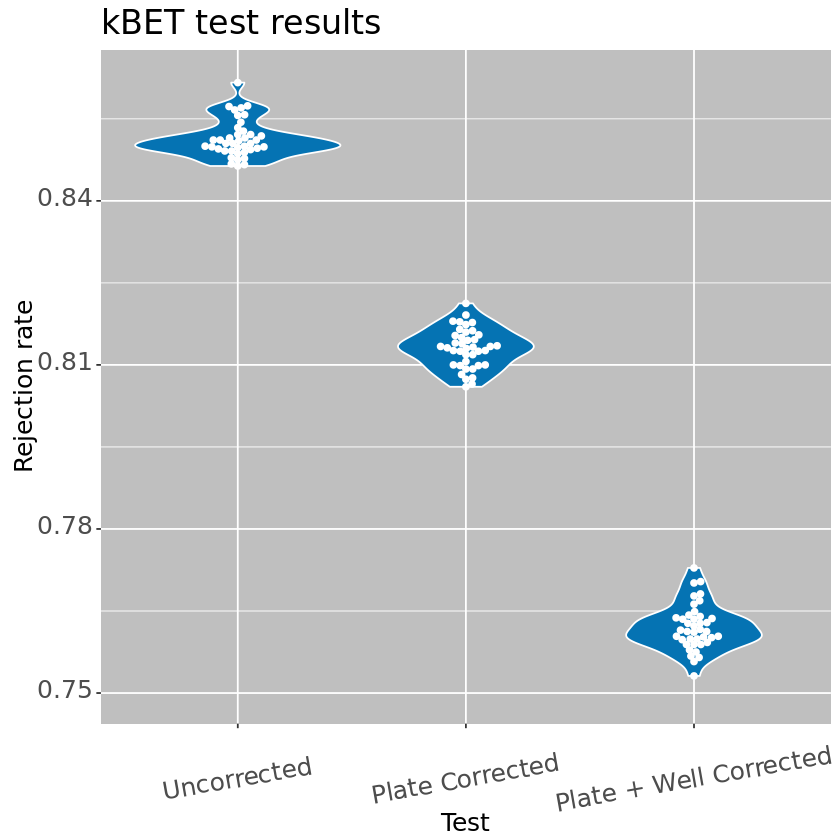

In [201]:
#kBET.well.full$summary
library(ggplot2)
#library(ggbeeswarm)
plot.data <- data.frame(class=rep(c('Uncorrected', 'Plate Corrected', 'Plate + Well Corrected'), 
                                  each=length(kBET.well.full$stats$kBET.observed)), 
                        data =  c(kBET.uncorrected.full$stats$kBET.observed, 
                                  kBET.plate.full$stats$kBET.observed, 
                                  kBET.well.full$stats$kBET.observed))
plot.data$class = factor(plot.data$class, levels=c("Uncorrected", "Plate Corrected", "Plate + Well Corrected"))
g <- ggplot(plot.data, aes(class, data)) + geom_violin(color='white', fill='#0573b3') + geom_beeswarm(color="white") +
     labs(x='Test', y='Rejection rate',title='kBET test results') +
     theme(plot.title = element_text(size=20),
           axis.text.x=element_text(angle=10, size=15, vjust=0.3),
           axis.text.y=element_text(angle=0, size=15, vjust=0.3),
           axis.title.x=element_text(angle=0, size=15, vjust=0.0),
           axis.title.y=element_text(angle=90, size=15, vjust=0),
           panel.background = element_rect(fill = 'grey75')) +  
           scale_y_continuous(limits=c(0.75,0.862))
print(g)

In [139]:
print("Uncorrected Data: Well Effect ")

kBET.data.uncorrected.well.summary.observed = list()
for(result in c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)){
    sub_names = names(kBET.data.uncorrected.well)
    print(sub_names[result])
    
    kBET.data.uncorrected.well.summary.observed[result] = kBET.data.uncorrected.well[[result]]$summary$kBET.observed[1]

    #print(str(result[i]$results))
    #print(str(result[i]$stats))
    #print(str(result[i]$average.pval))
    #print(str(result[i]$params))
}

print("Plate Corrected Data: Well Effect")

kBET.data.plate.well.summary.observed = list()
for(result in c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)){
    sub_names = names(kBET.data.plate.well)
    print(sub_names[result])
    
    kBET.data.plate.well.summary.observed[result] = kBET.data.plate.well[[result]]$summary$kBET.observed[1]

    #print(str(result[i]$results))
    #print(str(result[i]$stats))
    #print(str(result[i]$average.pval))
    #print(str(result[i]$params))
}

print("Plate + Well Corrected Data: Well Effect")

kBET.data.well.well.summary.observed = list()
for(result in c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)){
    sub_names = names(kBET.data.well.well)
    print(sub_names[result])
    
    kBET.data.well.well.summary.observed[result] = kBET.data.well.well[[result]]$summary$kBET.observed[1]

    #print(str(result[i]$results))
    #print(str(result[i]$stats))
    #print(str(result[i]$average.pval))
    #print(str(result[i]$params))
}

[1] "Uncorrected Data: Well Effect "
[1] "WT_0"
[1] "CloneA_0"
[1] "CloneE_0"
[1] "WT_0.7"
[1] "CloneA_0.7"
[1] "CloneE_0.7"
[1] "WT_7"
[1] "CloneA_7"
[1] "CloneE_7"
[1] "WT_70"
[1] "CloneA_70"
[1] "CloneE_70"
[1] "Plate Corrected Data: Well Effect"
[1] "WT_0"
[1] "CloneA_0"
[1] "CloneE_0"
[1] "WT_0.7"
[1] "CloneA_0.7"
[1] "CloneE_0.7"
[1] "WT_7"
[1] "CloneA_7"
[1] "CloneE_7"
[1] "WT_70"
[1] "CloneA_70"
[1] "CloneE_70"
[1] "Plate + Well Corrected Data: Well Effect"
[1] "WT_0"
[1] "CloneA_0"
[1] "CloneE_0"
[1] "WT_0.7"
[1] "CloneA_0.7"
[1] "CloneE_0.7"
[1] "WT_7"
[1] "CloneA_7"
[1] "CloneE_7"
[1] "WT_70"
[1] "CloneA_70"
[1] "CloneE_70"


In [238]:
print("Uncorrected Data: Well Effect ")

kBET.data.uncorrected.well.plate.summary.observed = list()
for(result in c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)){
    sub_names = names(kBET.data.uncorrected.well)
    #print(sub_names[result])
    
    kBET.data.uncorrected.well.plate.summary.observed[result] = kBET.data.uncorrected.well.plate[[result]]$summary$kBET.observed[1]

    #print(str(result[i]$results))
    #print(str(result[i]$stats))
    #print(str(result[i]$average.pval))
    #print(str(result[i]$params))
}

print("Plate Corrected Data: Well Effect")

kBET.data.plate.well.plate.summary.observed = list()
for(result in c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)){
    sub_names = names(kBET.data.plate.well)
    #print(sub_names[result])
    
    kBET.data.plate.well.plate.summary.observed[result] = kBET.data.plate.well.plate[[result]]$summary$kBET.observed[1]

    #print(str(result[i]$results))
    #print(str(result[i]$stats))
    #print(str(result[i]$average.pval))
    #print(str(result[i]$params))
}

print("Plate + Well Corrected Data: Well Effect")

kBET.data.well.well.plate.summary.observed = list()
for(result in c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)){
    sub_names = names(kBET.data.well.well)
    #print(sub_names[result])
    
    kBET.data.well.well.plate.summary.observed[result] = kBET.data.well.well.plate[[result]]$summary$kBET.observed[1]

    #print(str(result[i]$results))
    #print(str(result[i]$stats))
    #print(str(result[i]$average.pval))
    #print(str(result[i]$params))
}

[1] "Uncorrected Data: Well Effect "
[1] "Plate Corrected Data: Well Effect"
[1] "Plate + Well Corrected Data: Well Effect"


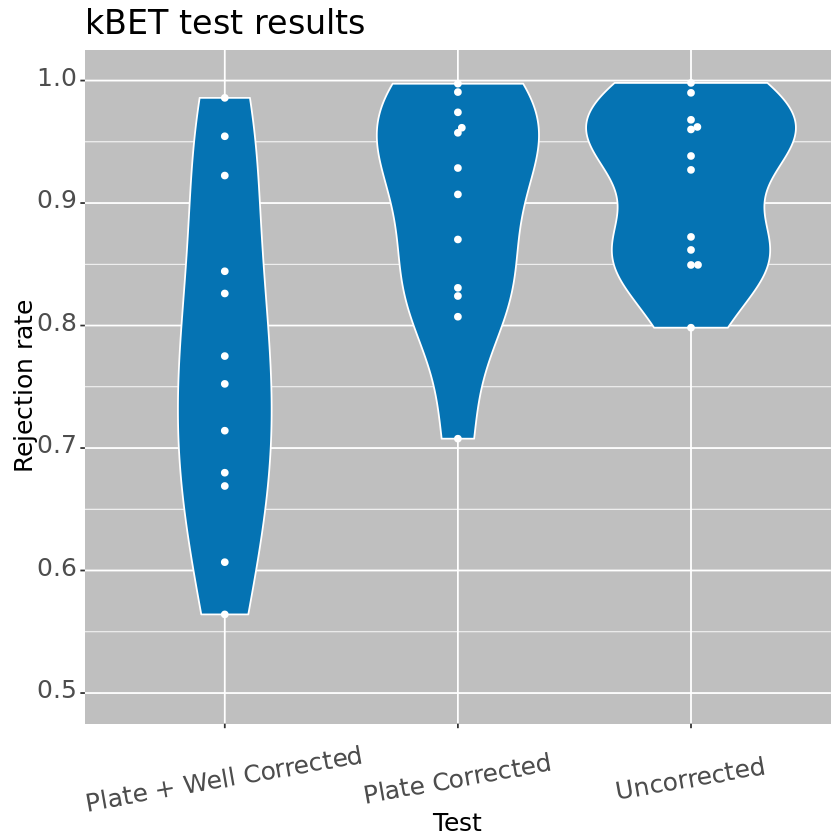

In [196]:
plot.data <- data.frame(class=rep(c('Uncorrected', 'Plate Corrected', 'Plate + Well Corrected'), 
                                  each=12), 
                        data =  c(as.numeric(kBET.data.uncorrected.well.summary.observed), 
                                  as.numeric(kBET.data.plate.well.summary.observed), 
                                  as.numeric(kBET.data.well.well.summary.observed)))
g <- ggplot(plot.data, aes(class, data)) + geom_violin(color='white', fill='#0573b3') + geom_beeswarm(color="white") +
     labs(x='Test', y='Rejection rate',title='kBET test results') +
     theme(plot.title = element_text(size=20),
           axis.text.x=element_text(angle=10, size=15, vjust=0.3),
           axis.text.y=element_text(angle=0, size=15, vjust=0.3),
           axis.title.x=element_text(angle=0, size=15, vjust=0.0),
           axis.title.y=element_text(angle=90, size=15, vjust=0),
           panel.background = element_rect(fill = 'grey75')) +  
           scale_y_continuous(limits=c(0.5,1.0))
print(g)


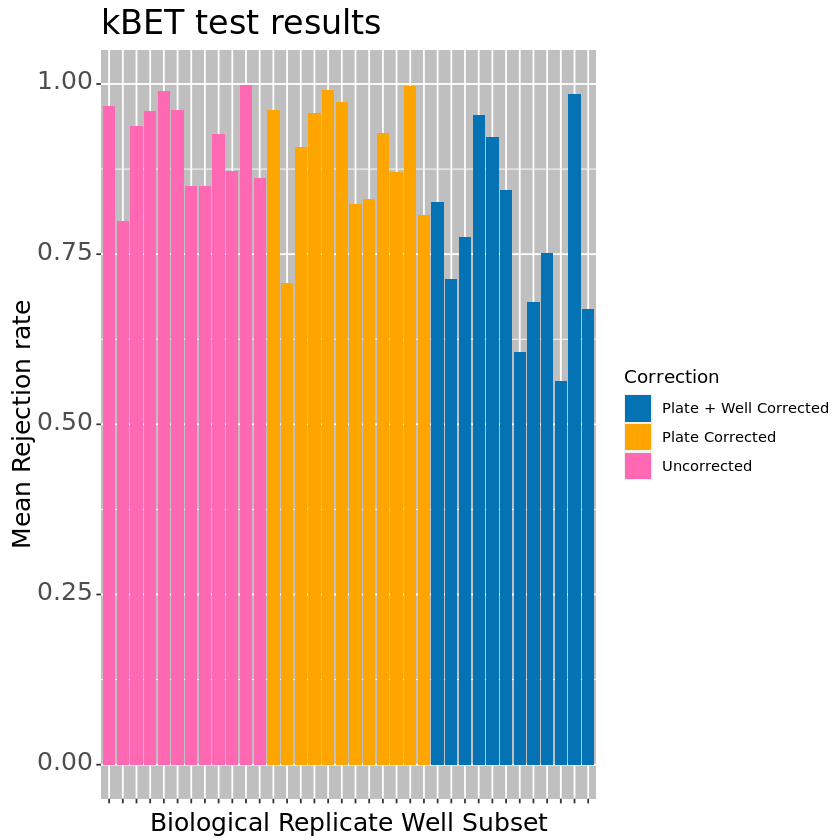

In [284]:
class = list()
for(s in c('Uncorrected', 'Plate Corrected', 'Plate + Well Corrected')){
    for(i in subsets){
        class = c(class, sprintf("%s: %s", s, i))
    }
}
plot.data <- data.frame(class=as.character(class), 
                        data =  c(as.numeric(kBET.data.uncorrected.well.summary.observed), 
                                  as.numeric(kBET.data.plate.well.summary.observed), 
                                  as.numeric(kBET.data.well.well.summary.observed)),
                        Correction=c(rep('Uncorrected', 12), rep('Plate Corrected',12), rep('Plate + Well Corrected',12)))
plot.data$class = factor(plot.data$class, levels=c(as.character(class)))
g <- ggplot(plot.data, aes(class, data, fill=Correction)) + geom_col() + scale_fill_manual(values=c('#0573b3', 'orange', 'hotpink')) +#fill=c(rep('#0573b3', 12), rep('orange', 12), rep('hotpink', 12))) +#+ stat_smooth() + scale_fill_manual(c('#0573b3', 'orange', 'pink')) + 
     labs(x='Biological Replicate Well Subset', y='Mean Rejection rate',title='kBET test results') + 
     theme(plot.title = element_text(size=20),
           axis.text.x=element_blank(),
           axis.text.y=element_text(angle=0, size=15, vjust=0.3),
           axis.title.x=element_text(angle=0, size=15, vjust=0.0),
           axis.title.y=element_text(angle=90, size=15, vjust=0.5),
           panel.background = element_rect(fill = 'grey75')) +  
           scale_y_continuous(limits=c(0.0,1.0))
print(g)
ggsave("myplot.png", plot = g)


In [181]:
install.packages('ggbeeswarm')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [202]:
install.packages('platetools')


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [205]:
library(platetools)
data.frame()

ERROR: Error in num_to_well(1:12, plate = 12): Plate needs to be 96, 384 or 1536


In [259]:
names(kBET.data.well.well.plate)

[1] "WT_0"       "CloneA_0"   "CloneE_0"   "WT_0.7"     "CloneA_0.7"
 [6] "CloneE_0.7" "WT_7"       "CloneA_7"   "CloneE_7"   "WT_70"     
[11] "CloneA_70"  "CloneE_70"